# Упражнение 19.1 — Одномерная минимизация

## Условие

Минимизировать функцию:

$$
f(x) = \frac{11}{1 + e^{-x}} + 7 \cos(3x) + x^2 - 1
$$


на интервале `[-5, 5]`.

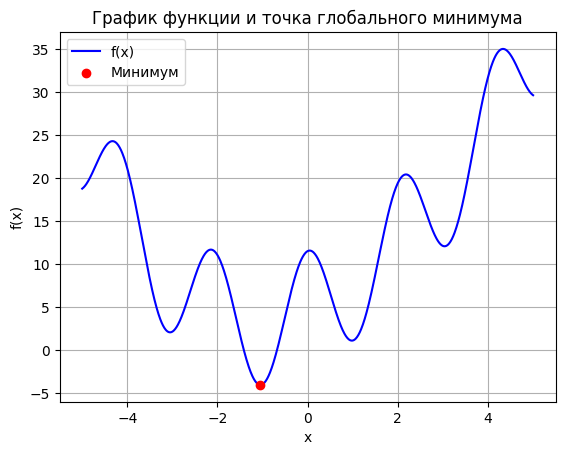

Минимум в точке: -1.0475116874093373
Значение функции: -4.0459808315904064


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

def f(x):
    return 11 / (1 + np.exp(-x)) + 7 * np.cos(3 * x) + x**2 - 1

result = minimize_scalar(f, bounds=(-5, 5))

# Визуализация
x_vals = np.linspace(-5, 5, 1000)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label='f(x)', color='blue')
plt.scatter(result.x, result.fun, color='red', label='Минимум', zorder=5)
plt.title("График функции и точка глобального минимума")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

print(f"Минимум в точке: {result.x}")
print(f"Значение функции: {result.fun}")


# Упражнение 20.2 (Безусловная оптимизация)

## Условие задачи

Найти минимум функции:

$$f(x,y) = 7x^2 + 3xy + 9y^2 + 8\exp\left[-\left(\frac{x^2}{3} - \frac{(y+3)^2}{5}\right)\right] + 9\exp\left[-\left(\frac{(x-1)^2}{5} + \frac{(y-2)^2}{2}\right)\right]$$

Используйте различные методы оптимизации:
1. Метод Нелдера-Мида
2. Метод локальной вариации (PRAXIS)
3. Метод BFGS
4. Метод Ньютона

Стартовая точка для всех методов: $x_0 = (0, 0)$


## Метод: Нелдер-Мида
Количество итераций: 101
Вызовов функции: 197
Вызовов градиента: 0
Финальное значение функции: 25.353520597360724
Решение: x1 = 0.779519565805534, x2 = -0.8940132544928863

Вызовы функций:
       Функция  Количество
0       eval_f         197
1  eval_grad_f           0


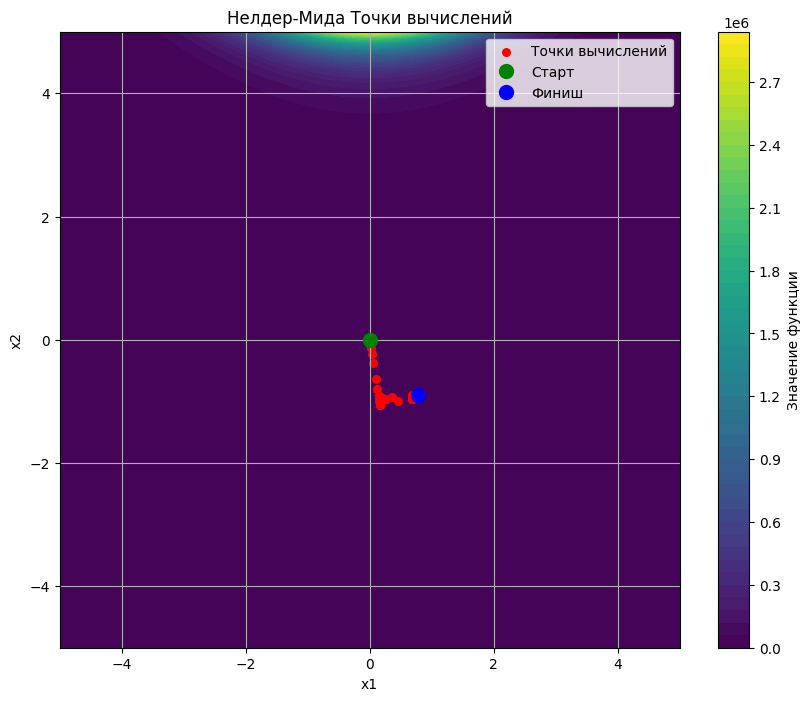

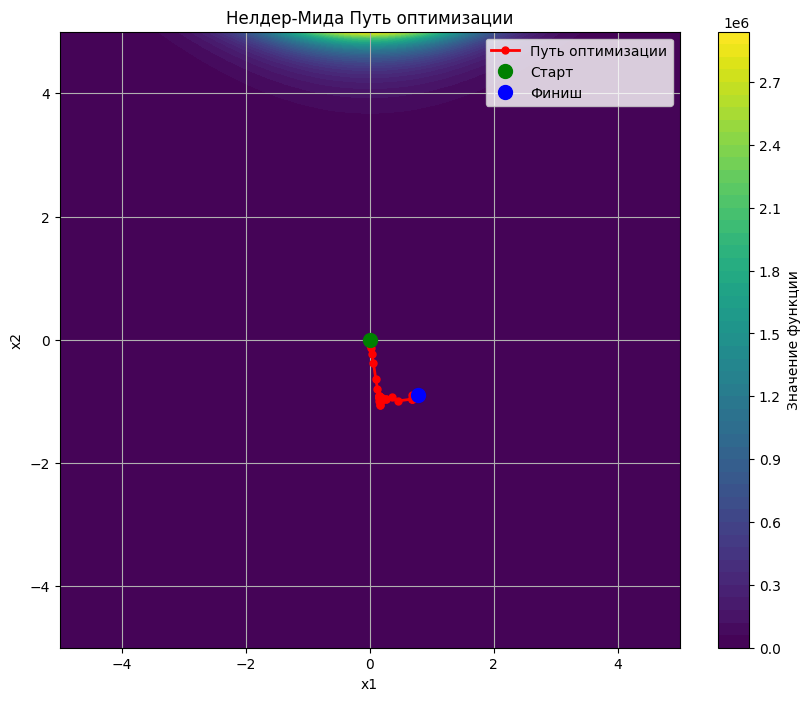

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as optimize
from matplotlib.colors import LogNorm
import pandas as pd

def objective_function(x):
    x1, x2 = x
    return (7 * x1**2 + 3 * x1 * x2 + 9 * x2**2 +
            8 * np.exp(-(x1**2 / 3 - (x2 + 3)**2 / 5)) +
            9 * np.exp(-((x1 - 1)**2 / 5 + (x2 - 2)**2 / 2)))

def gradient_function(x):
    x1, x2 = x
    
    term_A_exponent = -(x1**2 / 3 - (x2 + 3)**2 / 5)
    term_B_exponent = -((x1 - 1)**2 / 5 + (x2 - 2)**2 / 2)
    
    exp_A = np.exp(term_A_exponent)
    exp_B = np.exp(term_B_exponent)
    
    # df/dx1
    df_dx1 = (14 * x1 + 3 * x2 + 
              8 * exp_A * (-2 * x1 / 3) + 
              9 * exp_B * (-2 * (x1 - 1) / 5))
              
    # df/dx2
    df_dx2 = (3 * x1 + 18 * x2 + 
              8 * exp_A * (2 * (x2 + 3) / 5) + 
              9 * exp_B * (-(x2 - 2)))
    
    return np.array([df_dx1, df_dx2])

# Создание контурного графика целевой функции
def create_contour_plot(title):
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = objective_function([X[i, j], Y[i, j]])
    
    plt.figure(figsize=(10, 8))
    contour = plt.contourf(X, Y, Z, 50, cmap='viridis')
    plt.colorbar(label='Значение функции')
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    return plt, X, Y, Z

# отслеживания шагов оптимизации
def trace_optimization(method, x0, options=None, jac=None):
    iterations = []
    function_values = []
    points = []
    function_calls = 0
    gradient_calls = 0
    
    def callback(xk):
        nonlocal function_calls
        function_calls += 1
        iterations.append(len(iterations))
        function_values.append(objective_function(xk))
        points.append(xk.copy())
    
    if options is None:
        options = {'xtol': 1e-8, 'disp': True}
    
    if jac is not None:
        result = optimize.minimize(
            objective_function, 
            x0, 
            method=method,
            jac=jac,
            callback=callback,
            options=options
        )
        gradient_calls = result.njev if hasattr(result, 'njev') else 'Н/Д'
    else:
        result = optimize.minimize(
            objective_function, 
            x0, 
            method=method,
            callback=callback,
            options=options
        )
    
    # Обновление счетчика вызовов функции
    if hasattr(result, 'nfev'):
        function_calls = result.nfev
    
    return {
        'result': result,
        'iterations': iterations,
        'function_values': function_values,
        'points': np.array(points),
        'function_calls': function_calls,
        'gradient_calls': gradient_calls
    }

# Построение пути оптимизации на контурном графике
def plot_optimization_path(trace, title):
    plt, X, Y, Z = create_contour_plot(f"{title} Путь оптимизации")
    
    path = trace['points']
    plt.plot(path[:, 0], path[:, 1], 'r-o', markersize=5, linewidth=2, label='Путь оптимизации')
    
    # Отметка начальной и конечной точек
    plt.plot(path[0, 0], path[0, 1], 'go', markersize=10, label='Старт')
    plt.plot(path[-1, 0], path[-1, 1], 'bo', markersize=10, label='Финиш')
    
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_evaluation_points(trace, title):
    plt, X, Y, Z = create_contour_plot(f"{title} Точки вычислений")
    
    # Построение точек вычислений
    path = trace['points']
    plt.scatter(path[:, 0], path[:, 1], c='red', s=30, label='Точки вычислений')
    
    # Отметка начальной и конечной точек
    plt.plot(path[0, 0], path[0, 1], 'go', markersize=10, label='Старт')
    plt.plot(path[-1, 0], path[-1, 1], 'bo', markersize=10, label='Финиш')
    
    plt.legend()
    plt.grid(True)
    plt.show()

def display_stats(trace, method_name):
    result = trace['result']
    
    print(f"Количество итераций: {len(trace['iterations'])}")
    print(f"Вызовов функции: {trace['function_calls']}")
    
    if trace['gradient_calls'] != 'Н/Д':
        print(f"Вызовов градиента: {trace['gradient_calls']}")
    
    print(f"Финальное значение функции: {result.fun}")
    print(f"Решение: x1 = {result.x[0]}, x2 = {result.x[1]}")
    
    # Создание DataFrame для подсчета вызовов
    data = {'Функция': ['eval_f']}
    if trace['gradient_calls'] != 'Н/Д':
        data['Функция'].append('eval_grad_f')
    
    data['Количество'] = [trace['function_calls']]
    if trace['gradient_calls'] != 'Н/Д':
        data['Количество'].append(trace['gradient_calls'])
    
    df = pd.DataFrame(data)
    print("\nВызовы функций:")
    print(df)

# Начальная точка
x0 = np.array([0, 0])

# 1. Метод Нелдера-Мида
print("\n## Метод: Нелдер-Мида")
trace_nm = trace_optimization(
    method='Nelder-Mead',
    x0=x0,
    options={'xatol': 1e-8, 'maxiter': 200}
)
display_stats(trace_nm, "Нелдер-Мида")
plot_evaluation_points(trace_nm, "Нелдер-Мида")
plot_optimization_path(trace_nm, "Нелдер-Мида")



Метод Пауэлла


## Метод: Пауэлла (аналог PRAXIS)
Количество итераций: 3
Вызовов функции: 99
Вызовов градиента: 0
Финальное значение функции: 25.35352074193934
Решение: x1 = 0.7795477629196175, x2 = -0.8940982441748122

Вызовы функций:
       Функция  Количество
0       eval_f          99
1  eval_grad_f           0


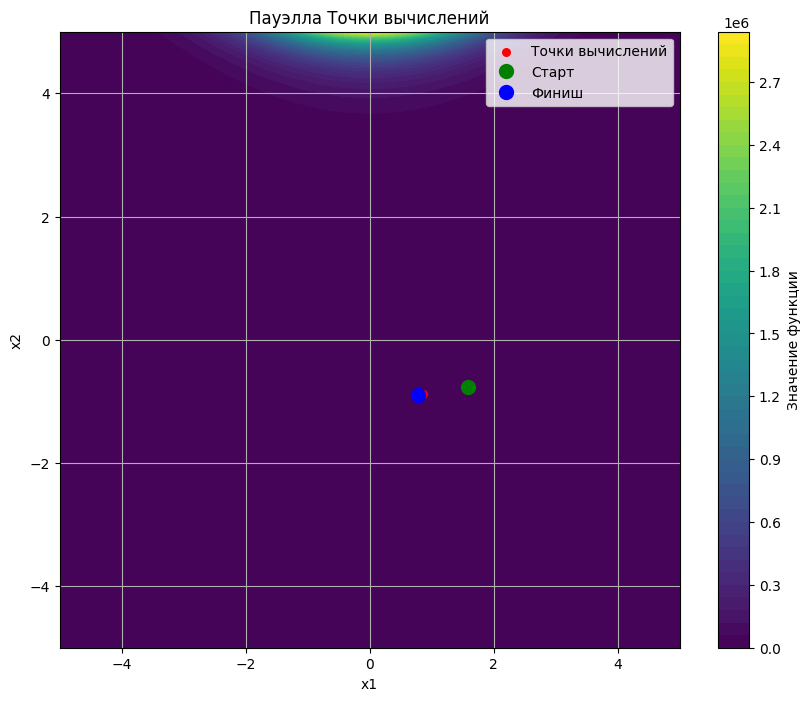

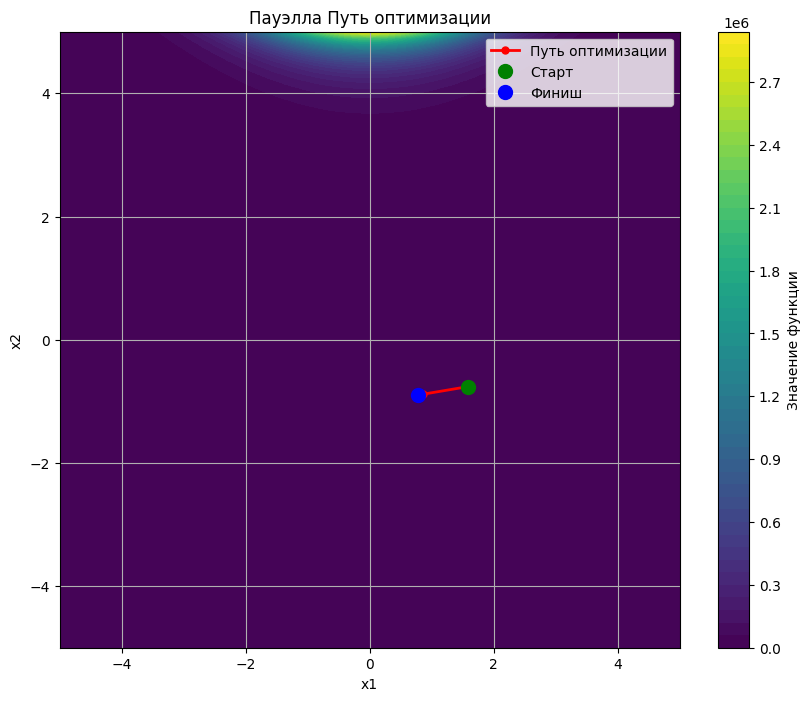

In [9]:
print("\n## Метод: Пауэлла (аналог PRAXIS)")
trace_powell = trace_optimization(
    method='Powell',
    x0=x0,
    options={'xtol': 1e-8, 'maxiter': 200}
)
display_stats(trace_powell, "Пауэлла")
plot_evaluation_points(trace_powell, "Пауэлла")
plot_optimization_path(trace_powell, "Пауэлла")

Метод BFGS


## Метод: BFGS
Количество итераций: 9
Вызовов функции: 48
Вызовов градиента: 37
Финальное значение функции: 25.353520597360728
Решение: x1 = 0.7795195941235908, x2 = -0.894013261842999

Вызовы функций:
       Функция  Количество
0       eval_f          48
1  eval_grad_f          37


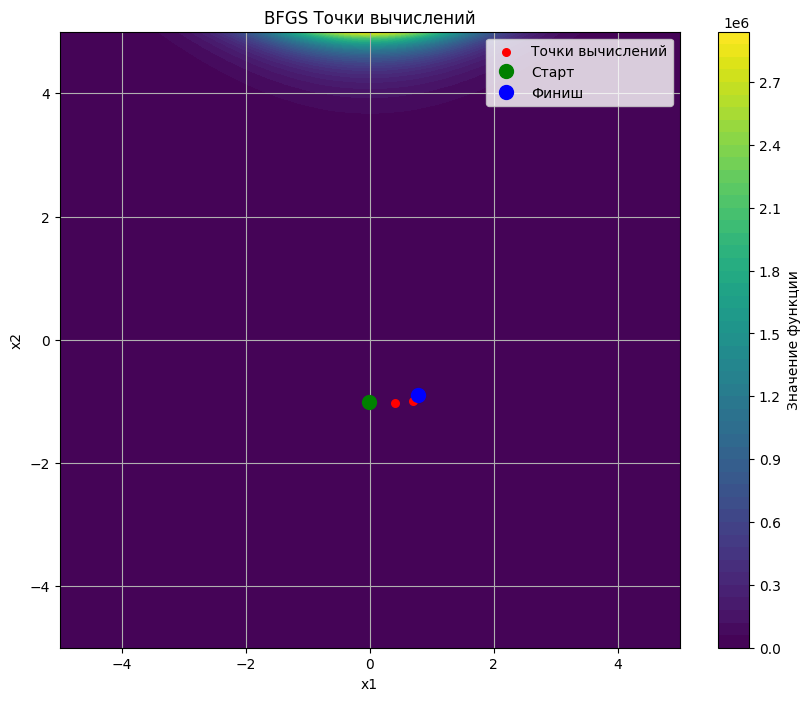

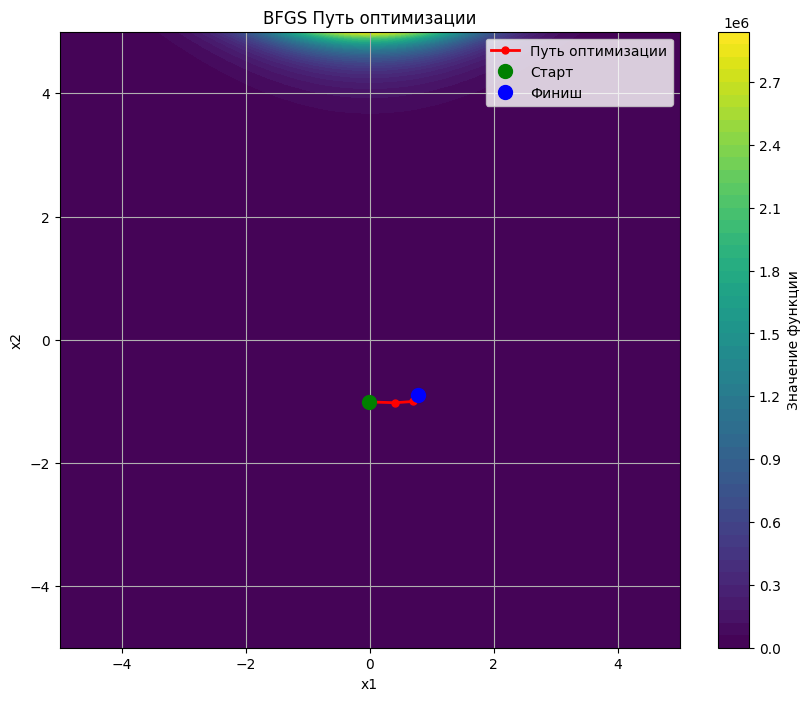

In [10]:

print("\n## Метод: BFGS")
trace_bfgs = trace_optimization(
    method='BFGS',
    x0=x0,
    jac=gradient_function,
    options={'gtol': 1e-8}
)
display_stats(trace_bfgs, "BFGS")
plot_evaluation_points(trace_bfgs, "BFGS")
plot_optimization_path(trace_bfgs, "BFGS")

Метод Ньютона-КГ


## Метод: Ньютона-КГ
Количество итераций: 8
Вызовов функции: 10
Вызовов градиента: 29
Финальное значение функции: 25.353520597360724
Решение: x1 = 0.779519576786294, x2 = -0.8940132561895039

Вызовы функций:
       Функция  Количество
0       eval_f          10
1  eval_grad_f          29


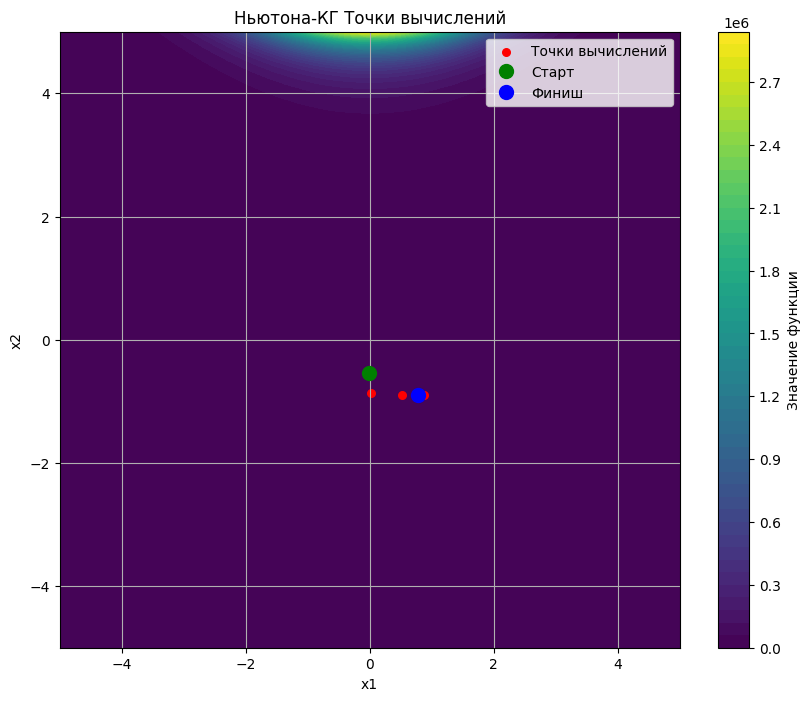

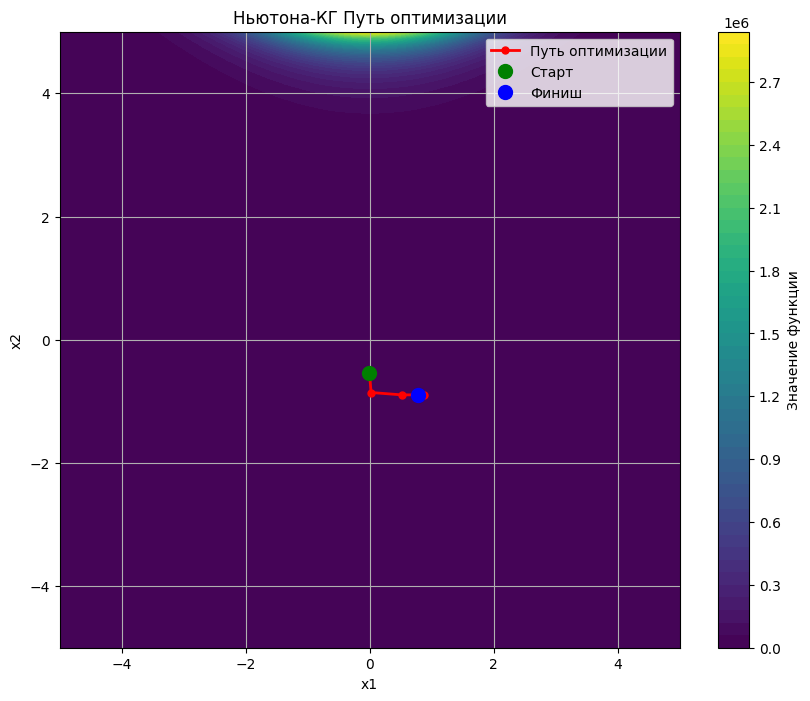

In [11]:

print("\n## Метод: Ньютона-КГ")
trace_newton = trace_optimization(
    method='Newton-CG',
    x0=x0,
    jac=gradient_function,
    options={'xtol': 1e-8}
)
display_stats(trace_newton, "Ньютона-КГ")
plot_evaluation_points(trace_newton, "Ньютона-КГ")
plot_optimization_path(trace_newton, "Ньютона-КГ")



# Упражнение 19.3

Минимизировать функцию `f(x1, x2)` при следующих ограничениях:

```math
g_1(x_1, x_2) = \frac{x_1^2}{10} + \frac{x_2^2}{3} - \frac{x_1 x_2}{5} - 6 \leq 0  
```

```math
g_2(x_1, x_2) = \frac{x_1^2}{3} + \frac{x_2^2}{10} + \frac{x_1 x_2}{5} - 3 \leq 0
```

Применить метод численной оптимизации с учетом ограничений (например, метод COBYLA и MMA).

In [12]:
import nlopt

# Целевая функция
def f(x, grad=None):
    return 11 / (1 + np.exp(-x[0])) + 7 * np.cos(3 * x[0]) + x[0]**2 - 1 + x[1]**2

# Неравенства: g(x) <= 0
def g1(x, grad=None):
    return (x[0]**2 / 10) + (x[1]**2 / 3) - (x[0] * x[1] / 5) - 6

def g2(x, grad=None):
    return (x[0]**2 / 3) + (x[1]**2 / 10) + (x[0] * x[1] / 5) - 3

opt = nlopt.opt(nlopt.LN_COBYLA, 2)
opt.set_min_objective(f)
opt.add_inequality_constraint(g1, 1e-8)
opt.add_inequality_constraint(g2, 1e-8)
opt.set_xtol_rel(1e-8)
opt.set_lower_bounds([-5, -5])
opt.set_upper_bounds([5, 5])

x0 = [0.0, 0.0]
x_opt = opt.optimize(x0)
min_val = opt.last_optimum_value()

print("COBYLA:")
print(f"Минимум в точке: {x_opt}")
print(f"Значение функции: {min_val}")


COBYLA:
Минимум в точке: [-1.04751197e+00 -6.95223495e-08]
Значение функции: -4.045980831592861


In [13]:
def f_with_grad(x, grad):
    if grad.size > 0:
        grad[0] = -11 * np.exp(-x[0]) / (1 + np.exp(-x[0]))**2 - 21 * np.sin(3 * x[0]) + 2 * x[0]
        grad[1] = 2 * x[1]
    return f(x)

def g1_with_grad(x, grad):
    if grad.size > 0:
        grad[0] = (2 * x[0] / 10) - (x[1] / 5)
        grad[1] = (2 * x[1] / 3) - (x[0] / 5)
    return g1(x)

def g2_with_grad(x, grad):
    if grad.size > 0:
        grad[0] = (2 * x[0] / 3) + (x[1] / 5)
        grad[1] = (2 * x[1] / 10) + (x[0] / 5)
    return g2(x)

opt_mma = nlopt.opt(nlopt.LD_MMA, 2)
opt_mma.set_min_objective(f_with_grad)
opt_mma.add_inequality_constraint(g1_with_grad, 1e-8)
opt_mma.add_inequality_constraint(g2_with_grad, 1e-8)
opt_mma.set_xtol_rel(1e-8)
opt_mma.set_lower_bounds([-5, -5])
opt_mma.set_upper_bounds([5, 5])

x_opt_mma = opt_mma.optimize([0.0, 0.0])
min_val_mma = opt_mma.last_optimum_value()

print("MMA:")
print(f"Минимум в точке: {x_opt_mma}")
print(f"Значение функции: {min_val_mma}")


MMA:
Минимум в точке: [1.03384361 0.        ]
Значение функции: 1.1887133583322305


# Упражнение 20.4 (Оптимизация овражной функции)

## Условие задачи

Найти минимум овражной функции:

$$f(x,y) = (9x+8y-5)^4+(5x+2y-1)^4$$

Исследуйте поведение различных методов оптимизации:
1. Метод Нелдера-Мида
2. Метод Ньютона

Стартовая точка для всех методов: $x_0 = (0, 0)$

Сравните эффективность методов для данной овражной функции.


## Метод: Нелдера-Мида (Овраг)
Результат оптимизации (Нелдер-Мид):
Успех: True
Статус: 0
Сообщение: Optimization terminated successfully.
Вызовы функции: 196
Решение: x = -0.09090909, y = 0.72727272
Значение функции: 0.00000000


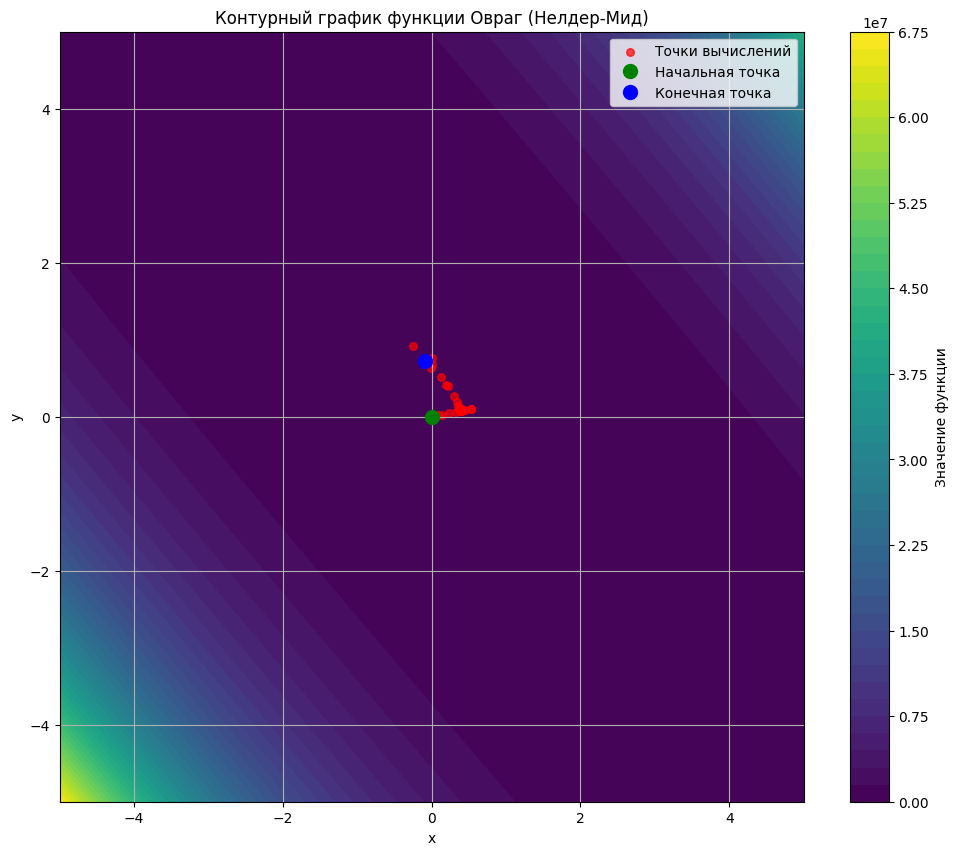

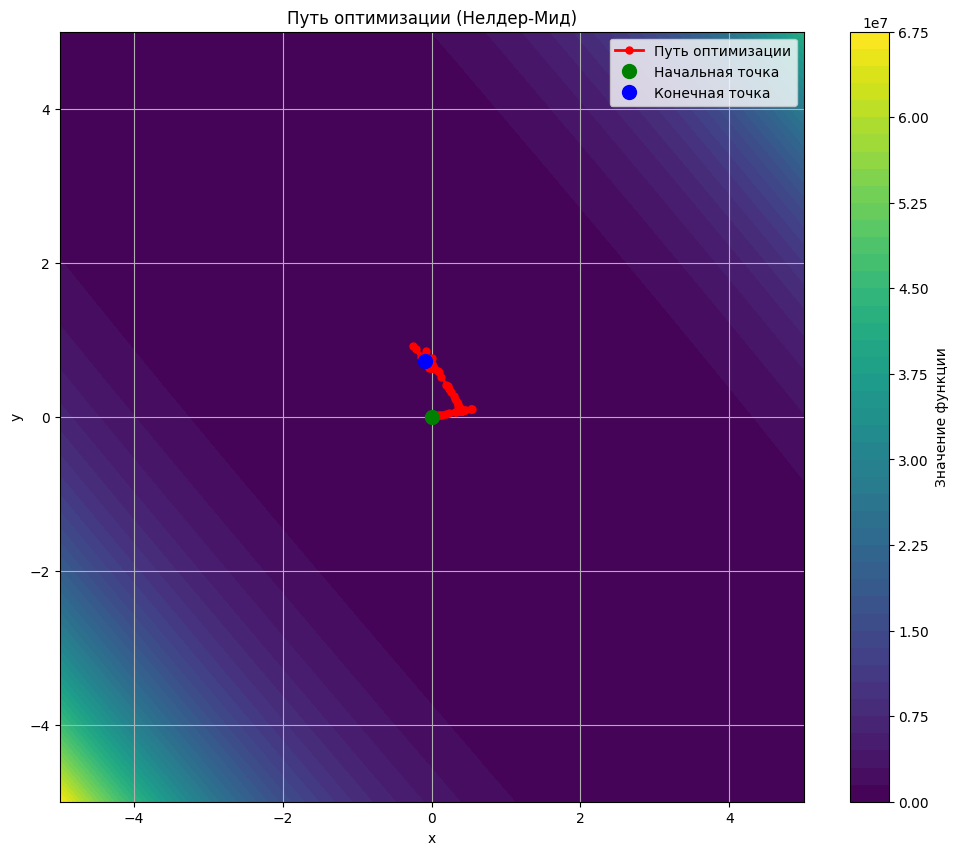


Вызовы функций (Нелдер-Мид):
  Функция  Количество
0  eval_f         196

## Метод: Ньютона (Овраг)
Результат оптимизации (Ньютон):
Успех: True
Статус: 0
Сообщение: Optimization terminated successfully.
Вызовы функции: 23
Вызовы градиента: 77
Решение: x = -0.08915702, y = 0.72492513
Значение функции: 0.00000000


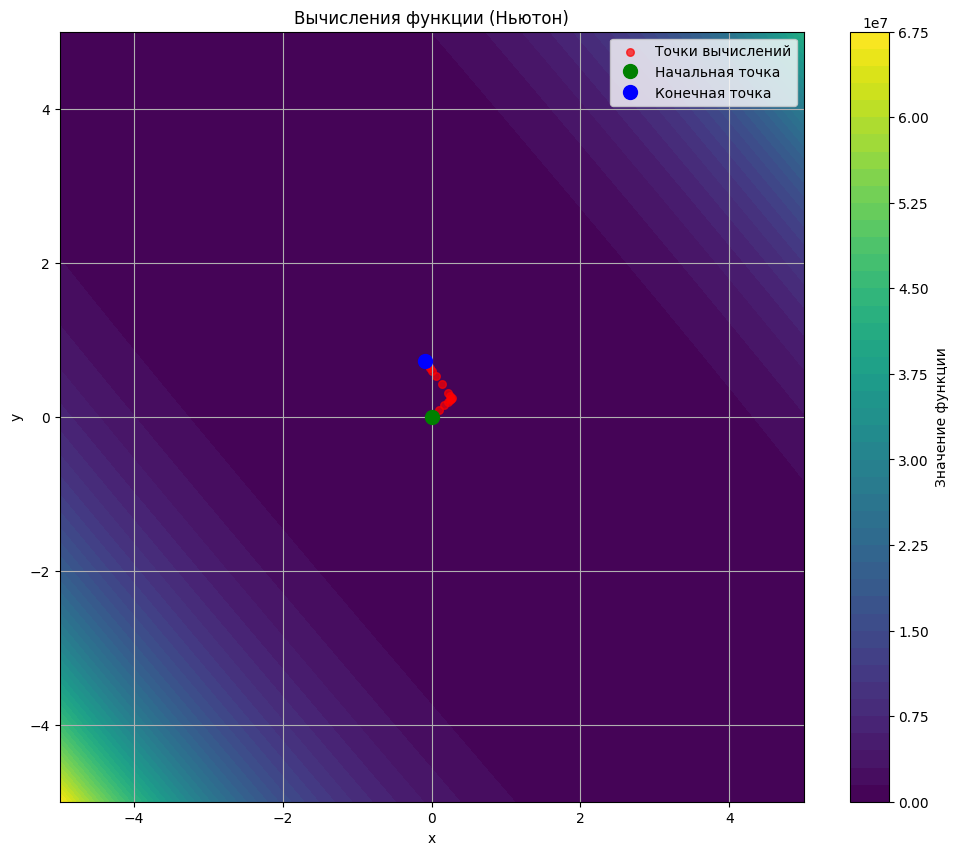

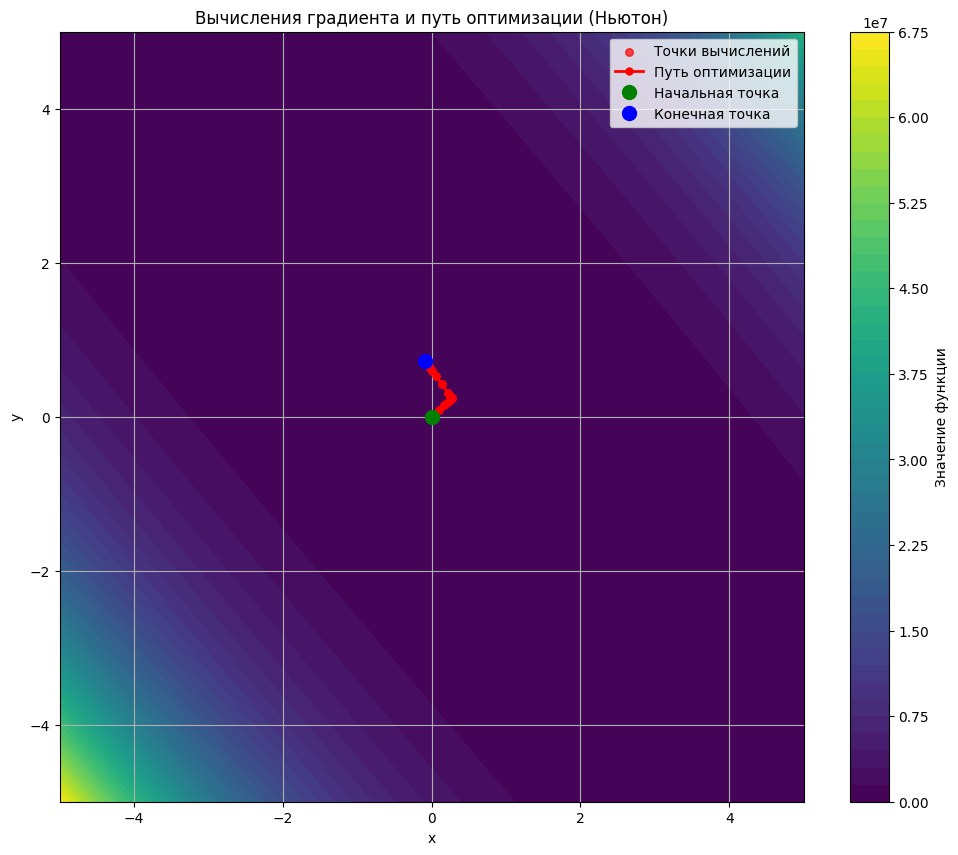

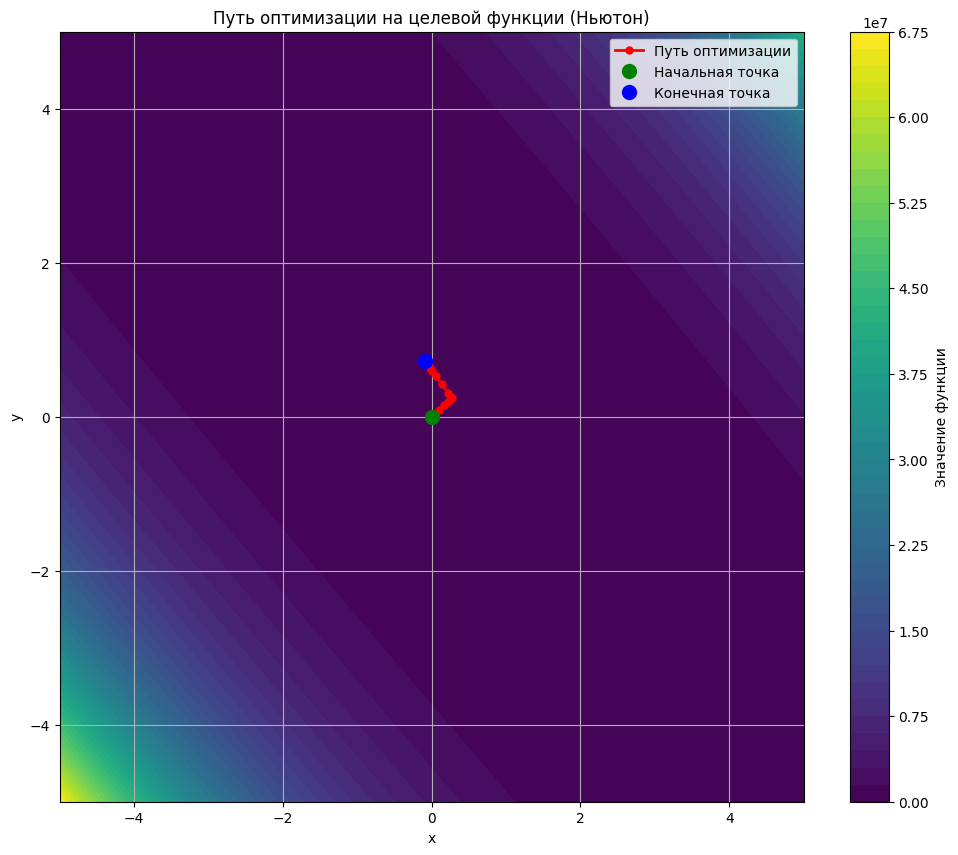


Вызовы функций (Ньютон):
       Функция  Количество
0       eval_f          23
1  eval_grad_f          77


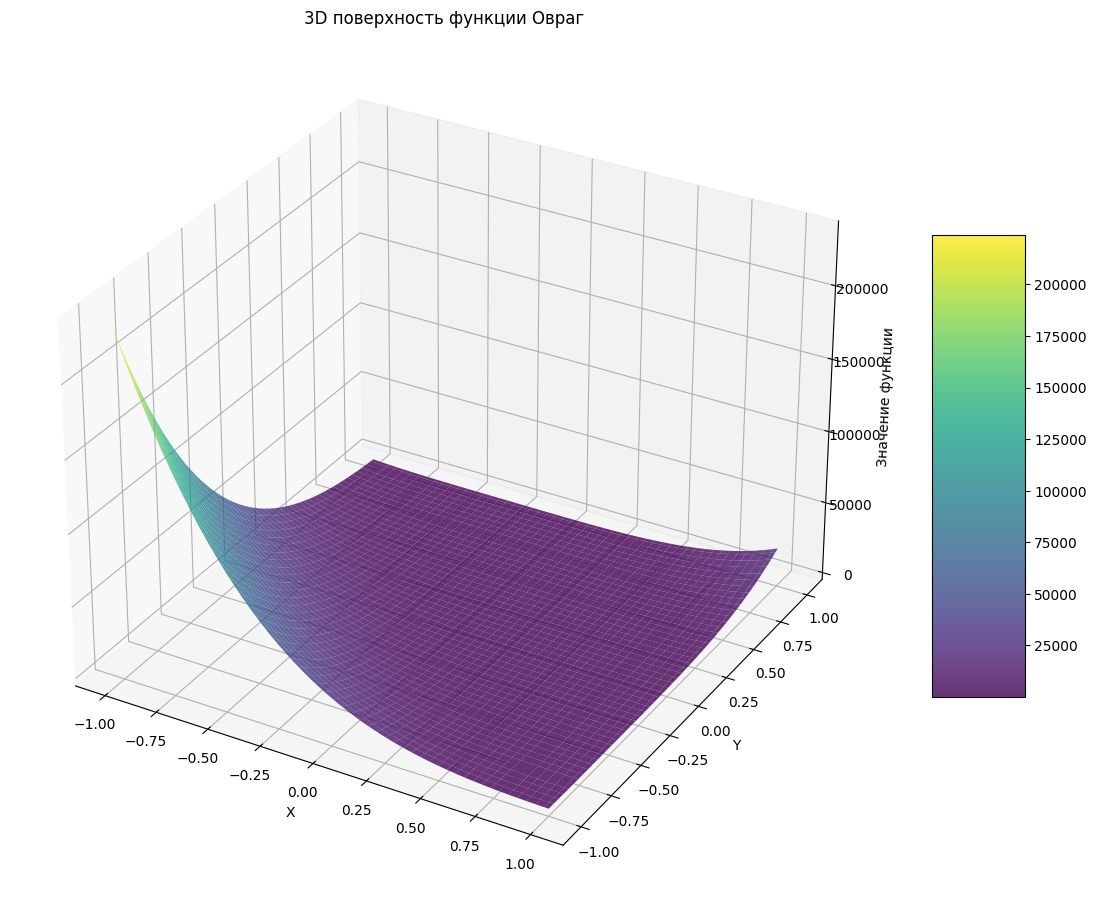

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as optimize
import pandas as pd

def ravine_function(vars):
    x, y = vars
    term1 = (9 * x + 8 * y - 5)**4
    term2 = (5 * x + 2 * y - 1)**4
    return term1 + term2

# градиент
def ravine_gradient(vars):
    x, y = vars
    
    # df/dx
    df_dx = 4 * (9 * x + 8 * y - 5)**3 * 9 + 4 * (5 * x + 2 * y - 1)**3 * 5
    
    # df/dy
    df_dy = 4 * (9 * x + 8 * y - 5)**3 * 8 + 4 * (5 * x + 2 * y - 1)**3 * 2
    
    return np.array([df_dx, df_dy])

# контурного графика целевой функции
def create_contour_plot(title, xlim=(-5, 5), ylim=(-5, 5), resolution=100):
    x = np.linspace(xlim[0], xlim[1], resolution)
    y = np.linspace(ylim[0], ylim[1], resolution)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = ravine_function([X[i, j], Y[i, j]])
    
    plt.figure(figsize=(12, 10))
    contour = plt.contourf(X, Y, Z, 50, cmap='viridis')
    plt.colorbar(label='Значение функции')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    
    return plt, X, Y, Z

def uni_sample(points, max_samples=100):
    n = len(points)
    if n <= max_samples:
        return points
    indices = np.linspace(0, n-1, max_samples, dtype=int)
    return [points[i] for i in indices]

def trace_optimization(method, x0, options=None, jac=None, bounds=None):
    # Установка параметров по умолчанию
    if options is None:
        if method == 'Nelder-Mead':
            options = {'xatol': 1e-8, 'maxiter': 500}
        else:
            options = {'xtol': 1e-8}
    
    # Инициализация переменных для отслеживания
    history = {'x': [], 'fun': [], 'grad': []}
    function_calls = 0
    gradient_calls = 0
    
    # Функции-обертки для отслеживания вызовов
    def objective_wrapper(x):
        nonlocal function_calls
        function_calls += 1
        value = ravine_function(x)
        history['x'].append(x.copy())
        history['fun'].append(value)
        return value
    
    def gradient_wrapper(x):
        nonlocal gradient_calls
        gradient_calls += 1
        grad = ravine_gradient(x)
        history['grad'].append(grad.copy())
        return grad
    
    # Запуск оптимизации
    if jac is not None:
        result = optimize.minimize(
            objective_wrapper, 
            x0, 
            method=method,
            jac=gradient_wrapper,
            options=options,
            bounds=bounds
        )
    else:
        result = optimize.minimize(
            objective_wrapper, 
            x0, 
            method=method,
            options=options,
            bounds=bounds
        )
    
    path_points = np.array(history['x'])
    
    eval_data = {
        'eval_f': [(x, f) for x, f in zip(history['x'], history['fun'])]
    }
    
    if jac is not None:
        eval_data['eval_grad_f'] = [(x, g) for x, g in zip(history['x'], history['grad'])]
    
    return {
        'result': result,
        'path': path_points,
        'eval': eval_data,
        'count': {
            'eval_f': function_calls,
            'eval_grad_f': gradient_calls if jac is not None else 0
        }
    }

def plot_eval_points(plt_obj, eval_points, sample_size=100):
    sampled_points = uni_sample(eval_points, sample_size)
    
    x_vals = [p[0][0] for p in sampled_points]
    y_vals = [p[0][1] for p in sampled_points]
    
    plt_obj.scatter(x_vals, y_vals, c='red', s=30, alpha=0.7, label='Точки вычислений')
    
    return plt_obj

def plot_start_stop_points(plt_obj, eval_points):
    if len(eval_points) == 0:
        return plt_obj
    
    start_x, start_y = eval_points[0][0]
    
    end_x, end_y = eval_points[-1][0]
    
    plt_obj.plot(start_x, start_y, 'go', markersize=10, label='Начальная точка')
    
    plt_obj.plot(end_x, end_y, 'bo', markersize=10, label='Конечная точка')
    
    return plt_obj

# путь оптимизации
def plot_path_points(plt_obj, path_points):
    # Извлечение координат x и y
    x_vals = path_points[:, 0]
    y_vals = path_points[:, 1]
    
    plt_obj.plot(x_vals, y_vals, 'r-o', markersize=5, linewidth=2, label='Путь оптимизации')
    
    return plt_obj

x0_ravine = np.array([0, 0])

# Границы 
bounds = [(-5, 5), (-5, 5)]

# 1. Метод Нелдера-Мида
print("\n## Метод: Нелдера-Мида (Овраг)")
trace_nm_ravine = trace_optimization(
    method='Nelder-Mead',
    x0=x0_ravine,
    options={'xatol': 1e-8, 'maxiter': 500}
)

print("Результат оптимизации (Нелдер-Мид):")
print(f"Успех: {trace_nm_ravine['result'].success}")
print(f"Статус: {trace_nm_ravine['result'].status}")
print(f"Сообщение: {trace_nm_ravine['result'].message}")
print(f"Вызовы функции: {trace_nm_ravine['count']['eval_f']}")
print(f"Решение: x = {trace_nm_ravine['result'].x[0]:.8f}, y = {trace_nm_ravine['result'].x[1]:.8f}")
print(f"Значение функции: {trace_nm_ravine['result'].fun:.8f}")

# Создание контурного графика для метода Нелдера-Мида
plt_nm, X_nm, Y_nm, Z_nm = create_contour_plot("Контурный график функции Овраг (Нелдер-Мид)")

# Построение точек вычислений
plt_nm = plot_eval_points(plt_nm, trace_nm_ravine['eval']['eval_f'])
plt_nm = plot_start_stop_points(plt_nm, trace_nm_ravine['eval']['eval_f'])
plt_nm.legend()
plt_nm.savefig('nelder_mead_ravine_eval_points.png', dpi=300, bbox_inches='tight')
plt_nm.show()

# Построение пути оптимизации
plt_path_nm, _, _, _ = create_contour_plot("Путь оптимизации (Нелдер-Мид)")
plt_path_nm = plot_path_points(plt_path_nm, trace_nm_ravine['path'])
plt_path_nm = plot_start_stop_points(plt_path_nm, trace_nm_ravine['eval']['eval_f'])
plt_path_nm.legend()
plt_path_nm.savefig('nelder_mead_ravine_path.png', dpi=300, bbox_inches='tight')
plt_path_nm.show()

# Вывод количества вызовов функций
print("\nВызовы функций (Нелдер-Мид):")
nm_calls_df = pd.DataFrame({
    'Функция': ['eval_f'],
    'Количество': [trace_nm_ravine['count']['eval_f']]
})
print(nm_calls_df)

# 2. Метод Ньютона (Newton-CG в scipy)
print("\n## Метод: Ньютона (Овраг)")
trace_newton_ravine = trace_optimization(
    method='Newton-CG',
    x0=x0_ravine,
    jac=True,
    options={'xtol': 1e-8}
)

print("Результат оптимизации (Ньютон):")
print(f"Успех: {trace_newton_ravine['result'].success}")
print(f"Статус: {trace_newton_ravine['result'].status}")
print(f"Сообщение: {trace_newton_ravine['result'].message}")
print(f"Вызовы функции: {trace_newton_ravine['count']['eval_f']}")
print(f"Вызовы градиента: {trace_newton_ravine['count']['eval_grad_f']}")
print(f"Решение: x = {trace_newton_ravine['result'].x[0]:.8f}, y = {trace_newton_ravine['result'].x[1]:.8f}")
print(f"Значение функции: {trace_newton_ravine['result'].fun:.8f}")

# Создание контурного графика для метода Ньютона - вычисления функции
plt_newton_func, X_n, Y_n, Z_n = create_contour_plot("Вычисления функции (Ньютон)")
plt_newton_func = plot_eval_points(plt_newton_func, trace_newton_ravine['eval']['eval_f'])
plt_newton_func = plot_start_stop_points(plt_newton_func, trace_newton_ravine['eval']['eval_f'])
plt_newton_func.legend()
plt_newton_func.savefig('newton_ravine_func_eval.png', dpi=300, bbox_inches='tight')
plt_newton_func.show()

# Создание контурного графика для метода Ньютона - вычисления градиента и путь оптимизации
plt_newton_grad, _, _, _ = create_contour_plot("Вычисления градиента и путь оптимизации (Ньютон)")
plt_newton_grad = plot_eval_points(plt_newton_grad, trace_newton_ravine['eval']['eval_grad_f'])
plt_newton_grad = plot_path_points(plt_newton_grad, trace_newton_ravine['path'])
plt_newton_grad = plot_start_stop_points(plt_newton_grad, trace_newton_ravine['eval']['eval_grad_f'])
plt_newton_grad.legend()
plt_newton_grad.savefig('newton_ravine_grad_eval.png', dpi=300, bbox_inches='tight')
plt_newton_grad.show()

# Создание контурного графика для метода Ньютона - путь оптимизации
plt_newton_path, _, _, _ = create_contour_plot("Путь оптимизации на целевой функции (Ньютон)")
plt_newton_path = plot_path_points(plt_newton_path, trace_newton_ravine['path'])
plt_newton_path = plot_start_stop_points(plt_newton_path, trace_newton_ravine['eval']['eval_f'])
plt_newton_path.legend()
plt_newton_path.savefig('newton_ravine_path.png', dpi=300, bbox_inches='tight')
plt_newton_path.show()

# Вывод количества вызовов функций
print("\nВызовы функций (Ньютон):")
newton_calls_df = pd.DataFrame({
    'Функция': ['eval_f', 'eval_grad_f'],
    'Количество': [
        trace_newton_ravine['count']['eval_f'],
        trace_newton_ravine['count']['eval_grad_f']
    ]
})
print(newton_calls_df)

# 3D визуализация функции Овраг
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d')

# Генерация данных для 3D графика
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = ravine_function([X[i, j], Y[i, j]])

# Создание поверхности
surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.8, 
                        linewidth=0, antialiased=True)

# Добавление цветовой шкалы
fig.colorbar(surf, shrink=0.5, aspect=5)

# Установка подписей и заголовка
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Значение функции')
ax.set_title('3D поверхность функции Овраг')

plt.savefig('ravine_3d_surface.png', dpi=300, bbox_inches='tight')
plt.show()
    

Упражнение 21.4 (Овраг) Найти минимум функции 
(9x + 8y - 5) ^ 4 + (5x + 2y - 1) ^ 4 
Применить 
Метод Нелдера-Мида 
и Ньютона


Метод Нелдера-Мида:
Оптимальная точка: x = [-0.09094432  0.72732751]
Минимальное значение функции: f(x) = 2.353106529301087e-16
Количество итераций: 68
Количество вычислений функции: 133

Метод Ньютона:
Оптимальная точка: x = [-0.08915963  0.72492879]
Минимальное значение функции: f(x) = 3.532436422335481e-10
Количество итераций: 22
Количество вычислений функции: 22


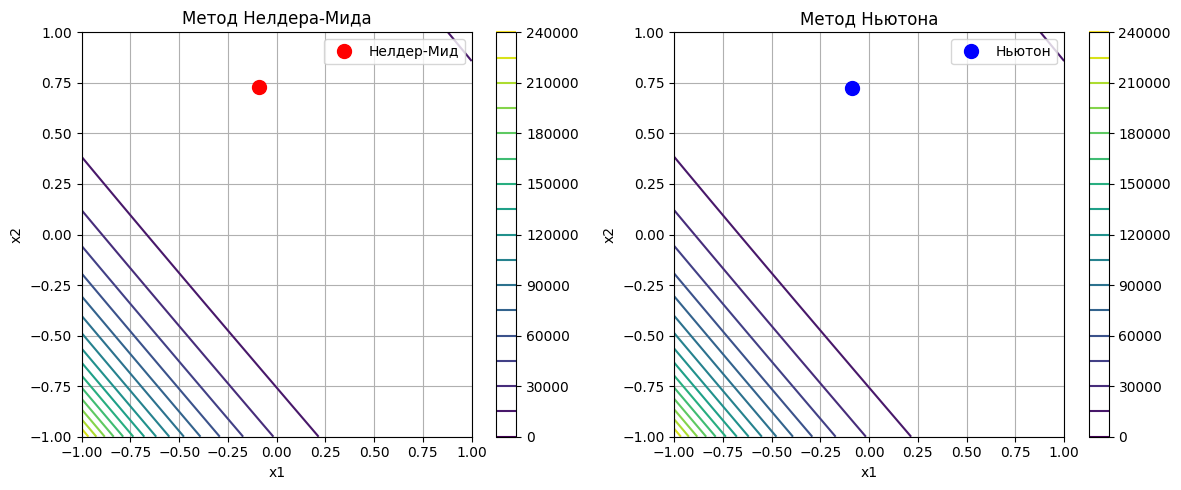


Аналитическое решение:
Точка минимума: x = [-0.09090909  0.72727273]
Значение функции в минимуме: f(x) = 0.0

Сравнение методов:
Нелдер-Мид - отклонение от аналитического решения: 0.000065
Ньютон - отклонение от аналитического решения: 0.002925


In [15]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def objective_function(x):
    return (9*x[0] + 8*x[1] - 5)**4 + (5*x[0] + 2*x[1] - 1)**4

def gradient(x):
    term1 = 9*x[0] + 8*x[1] - 5
    term2 = 5*x[0] + 2*x[1] - 1
    
    df_dx1 = 4 * term1**3 * 9 + 4 * term2**3 * 5
    df_dx2 = 4 * term1**3 * 8 + 4 * term2**3 * 2
    
    return np.array([df_dx1, df_dx2])

def hessian(x):
    term1 = 9*x[0] + 8*x[1] - 5
    term2 = 5*x[0] + 2*x[1] - 1
    
    d2f_dx1x1 = 12 * term1**2 * 9**2 + 12 * term2**2 * 5**2
    d2f_dx1x2 = 12 * term1**2 * 9 * 8 + 12 * term2**2 * 5 * 2
    d2f_dx2x2 = 12 * term1**2 * 8**2 + 12 * term2**2 * 2**2
    
    return np.array([[d2f_dx1x1, d2f_dx1x2], [d2f_dx1x2, d2f_dx2x2]])

x0 = np.array([0.0, 0.0])

result_nelder_mead = minimize(objective_function, x0, method='Nelder-Mead')

result_newton = minimize(objective_function, x0, method='Newton-CG', jac=gradient, hess=hessian)

print("Метод Нелдера-Мида:")
print(f"Оптимальная точка: x = {result_nelder_mead.x}")
print(f"Минимальное значение функции: f(x) = {result_nelder_mead.fun}")
print(f"Количество итераций: {result_nelder_mead.nit}")
print(f"Количество вычислений функции: {result_nelder_mead.nfev}")

print("\nМетод Ньютона:")
print(f"Оптимальная точка: x = {result_newton.x}")
print(f"Минимальное значение функции: f(x) = {result_newton.fun}")
print(f"Количество итераций: {result_newton.nit}")
print(f"Количество вычислений функции: {result_newton.nfev}")

x1_range = np.linspace(-1, 1, 100)
x2_range = np.linspace(-1, 1, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)
Z = objective_function([X1, X2])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
contour = plt.contour(X1, X2, Z, levels=20)
plt.colorbar(contour)
plt.plot(result_nelder_mead.x[0], result_nelder_mead.x[1], 'ro', markersize=10, label='Нелдер-Мид')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Метод Нелдера-Мида')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
contour = plt.contour(X1, X2, Z, levels=20)
plt.colorbar(contour)
plt.plot(result_newton.x[0], result_newton.x[1], 'bo', markersize=10, label='Ньютон')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Метод Ньютона')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

A = np.array([[9, 8], [5, 2]])
b = np.array([5, 1])
analytical_solution = np.linalg.solve(A, b)

print(f"\nАналитическое решение:")
print(f"Точка минимума: x = {analytical_solution}")
print(f"Значение функции в минимуме: f(x) = {objective_function(analytical_solution)}")

print(f"\nСравнение методов:")
print(f"Нелдер-Мид - отклонение от аналитического решения: {np.linalg.norm(result_nelder_mead.x - analytical_solution):.6f}")
print(f"Ньютон - отклонение от аналитического решения: {np.linalg.norm(result_newton.x - analytical_solution):.6f}")

Упражнение 21.5 (Много переменных) Найти минимум ряда целевых функций для N = 20, 50, 200 Вектор коэффициентов L₁ и в, генерировать случайным образом F=( sum i = 1 to N L i x i -b)^ 2 
Применить 
Метод Нелдера-Мида
и BFGS


N = 20
Нелдер-Мид: время = 0.0091s, значение = 9.363232e-10, вычисления = 689
BFGS: время = 0.0004s, значение = 4.139847e-32, вычисления = 3

N = 50
Нелдер-Мид: время = 0.0327s, значение = 1.939920e-10, вычисления = 2017
BFGS: время = 0.0003s, значение = 2.875634e-28, вычисления = 3

N = 200
Нелдер-Мид: время = 0.8679s, значение = 4.600015e-13, вычисления = 13116
BFGS: время = 0.0016s, значение = 3.245330e-27, вычисления = 3


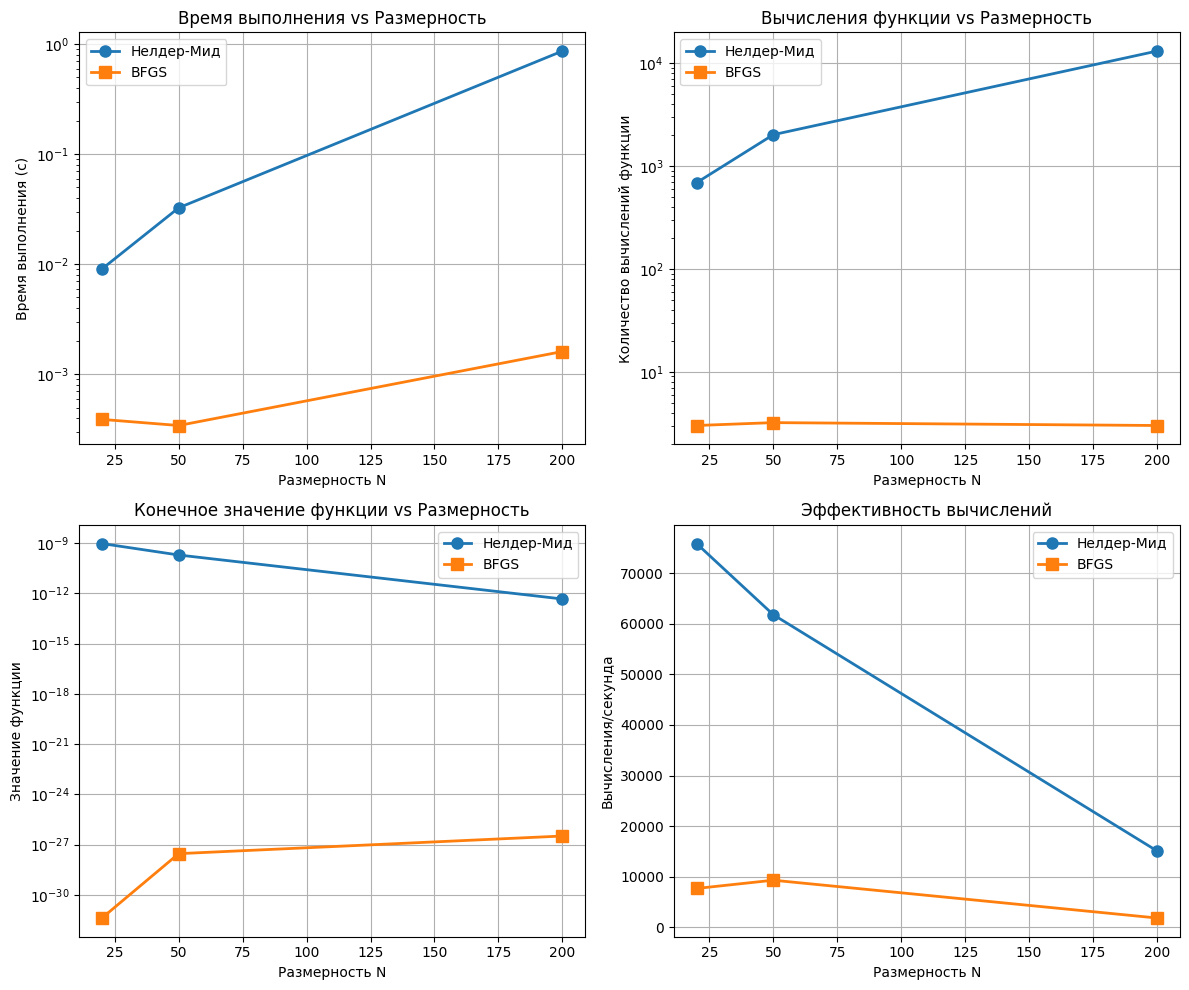


Сводная таблица результатов:
N		Метод		Время(с)	Значение		Вычисления
----------------------------------------------------------------------
20		Нелдер-Мид	0.0091		9.36e-10	689
20		BFGS		0.0004		4.14e-32	3

50		Нелдер-Мид	0.0327		1.94e-10	2017
50		BFGS		0.0003		2.88e-28	3

200		Нелдер-Мид	0.8679		4.60e-13	13116
200		BFGS		0.0016		3.25e-27	3

Проверка на N=20:
Аналитическое значение функции: 0.0000000000e+00
Нелдер-Мид значение функции: 1.8566825147e-10
BFGS значение функции: 0.0000000000e+00


In [16]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import time

def create_objective_function(L, b):
    def objective(x):
        return (np.dot(L, x) - b)**2
    return objective

def create_gradient(L, b):
    def gradient(x):
        return 2 * (np.dot(L, x) - b) * L
    return gradient

def run_optimization_experiment(N_values, num_experiments=5):
    results = {}
    
    for N in N_values:
        print(f"\nN = {N}")
        
        nelder_mead_times = []
        bfgs_times = []
        nelder_mead_results = []
        bfgs_results = []
        
        for exp in range(num_experiments):
            np.random.seed(exp + 42)
            L = np.random.randn(N)
            b = np.random.randn()
            
            objective = create_objective_function(L, b)
            gradient = create_gradient(L, b)
            
            x0 = np.random.randn(N)
            
            start_time = time.time()
            result_nm = minimize(objective, x0, method='Nelder-Mead')
            nm_time = time.time() - start_time
            
            start_time = time.time()
            result_bfgs = minimize(objective, x0, method='BFGS', jac=gradient)
            bfgs_time = time.time() - start_time
            
            nelder_mead_times.append(nm_time)
            bfgs_times.append(bfgs_time)
            nelder_mead_results.append(result_nm)
            bfgs_results.append(result_bfgs)
        
        results[N] = {
            'nelder_mead': {
                'times': nelder_mead_times,
                'results': nelder_mead_results,
                'avg_time': np.mean(nelder_mead_times),
                'avg_fun': np.mean([r.fun for r in nelder_mead_results]),
                'avg_nfev': np.mean([r.nfev for r in nelder_mead_results])
            },
            'bfgs': {
                'times': bfgs_times,
                'results': bfgs_results,
                'avg_time': np.mean(bfgs_times),
                'avg_fun': np.mean([r.fun for r in bfgs_results]),
                'avg_nfev': np.mean([r.nfev for r in bfgs_results])
            }
        }
        
        print(f"Нелдер-Мид: время = {results[N]['nelder_mead']['avg_time']:.4f}s, "
              f"значение = {results[N]['nelder_mead']['avg_fun']:.6e}, "
              f"вычисления = {results[N]['nelder_mead']['avg_nfev']:.0f}")
        
        print(f"BFGS: время = {results[N]['bfgs']['avg_time']:.4f}s, "
              f"значение = {results[N]['bfgs']['avg_fun']:.6e}, "
              f"вычисления = {results[N]['bfgs']['avg_nfev']:.0f}")
    
    return results

N_values = [20, 50, 200]
results = run_optimization_experiment(N_values)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

N_list = list(results.keys())
nm_times = [results[N]['nelder_mead']['avg_time'] for N in N_list]
bfgs_times = [results[N]['bfgs']['avg_time'] for N in N_list]

axes[0, 0].plot(N_list, nm_times, 'o-', label='Нелдер-Мид', linewidth=2, markersize=8)
axes[0, 0].plot(N_list, bfgs_times, 's-', label='BFGS', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Размерность N')
axes[0, 0].set_ylabel('Время выполнения (с)')
axes[0, 0].set_title('Время выполнения vs Размерность')
axes[0, 0].legend()
axes[0, 0].grid(True)
axes[0, 0].set_yscale('log')

nm_nfev = [results[N]['nelder_mead']['avg_nfev'] for N in N_list]
bfgs_nfev = [results[N]['bfgs']['avg_nfev'] for N in N_list]

axes[0, 1].plot(N_list, nm_nfev, 'o-', label='Нелдер-Мид', linewidth=2, markersize=8)
axes[0, 1].plot(N_list, bfgs_nfev, 's-', label='BFGS', linewidth=2, markersize=8)
axes[0, 1].set_xlabel('Размерность N')
axes[0, 1].set_ylabel('Количество вычислений функции')
axes[0, 1].set_title('Вычисления функции vs Размерность')
axes[0, 1].legend()
axes[0, 1].grid(True)
axes[0, 1].set_yscale('log')

nm_fun = [results[N]['nelder_mead']['avg_fun'] for N in N_list]
bfgs_fun = [results[N]['bfgs']['avg_fun'] for N in N_list]

axes[1, 0].plot(N_list, nm_fun, 'o-', label='Нелдер-Мид', linewidth=2, markersize=8)
axes[1, 0].plot(N_list, bfgs_fun, 's-', label='BFGS', linewidth=2, markersize=8)
axes[1, 0].set_xlabel('Размерность N')
axes[1, 0].set_ylabel('Значение функции')
axes[1, 0].set_title('Конечное значение функции vs Размерность')
axes[1, 0].legend()
axes[1, 0].grid(True)
axes[1, 0].set_yscale('log')

efficiency_nm = [nm_nfev[i] / nm_times[i] for i in range(len(N_list))]
efficiency_bfgs = [bfgs_nfev[i] / bfgs_times[i] for i in range(len(N_list))]

axes[1, 1].plot(N_list, efficiency_nm, 'o-', label='Нелдер-Мид', linewidth=2, markersize=8)
axes[1, 1].plot(N_list, efficiency_bfgs, 's-', label='BFGS', linewidth=2, markersize=8)
axes[1, 1].set_xlabel('Размерность N')
axes[1, 1].set_ylabel('Вычисления/секунда')
axes[1, 1].set_title('Эффективность вычислений')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

print("\nСводная таблица результатов:")
print("N\t\tМетод\t\tВремя(с)\tЗначение\t\tВычисления")
print("-" * 70)
for N in N_values:
    print(f"{N}\t\tНелдер-Мид\t{results[N]['nelder_mead']['avg_time']:.4f}\t\t"
          f"{results[N]['nelder_mead']['avg_fun']:.2e}\t{results[N]['nelder_mead']['avg_nfev']:.0f}")
    print(f"{N}\t\tBFGS\t\t{results[N]['bfgs']['avg_time']:.4f}\t\t"
          f"{results[N]['bfgs']['avg_fun']:.2e}\t{results[N]['bfgs']['avg_nfev']:.0f}")
    print()

np.random.seed(42)
N = 20
L = np.random.randn(N)
b = np.random.randn()
analytical_solution = L * b / np.dot(L, L)

objective = create_objective_function(L, b)
x0 = np.random.randn(N)

result_nm = minimize(objective, x0, method='Nelder-Mead')
result_bfgs = minimize(objective, x0, method='BFGS', jac=create_gradient(L, b))

print(f"Проверка на N=20:")
print(f"Аналитическое значение функции: {objective(analytical_solution):.10e}")
print(f"Нелдер-Мид значение функции: {result_nm.fun:.10e}")
print(f"BFGS значение функции: {result_bfgs.fun:.10e}")

Упражнение 21.6 (С ограничениями) Решить  используя штрафные функции.   (x ^ 2)/10 + (y ^ 2)/3 - (xy)/5 <= 6 (x ^ 2)/3 + (y ^ 2)/104 + (xy)/5 <= 3  

Параметр штрафа r = 1
Оптимальная точка: x = [0. 0.]
Значение целевой функции: 0.000000
Ограничение 1: 6.000000
Ограничение 2: 3.000000
Штрафная функция: 0.000000
--------------------------------------------------
Параметр штрафа r = 10
Оптимальная точка: x = [0. 0.]
Значение целевой функции: 0.000000
Ограничение 1: 6.000000
Ограничение 2: 3.000000
Штрафная функция: 0.000000
--------------------------------------------------
Параметр штрафа r = 100
Оптимальная точка: x = [0. 0.]
Значение целевой функции: 0.000000
Ограничение 1: 6.000000
Ограничение 2: 3.000000
Штрафная функция: 0.000000
--------------------------------------------------
Параметр штрафа r = 1000
Оптимальная точка: x = [0. 0.]
Значение целевой функции: 0.000000
Ограничение 1: 6.000000
Ограничение 2: 3.000000
Штрафная функция: 0.000000
--------------------------------------------------
Параметр штрафа r = 10000
Оптимальная точка: x = [0. 0.]
Значение целевой функции: 0.000000
Ограничение 1: 6.000000
Ограничение 2: 3.00000

/tmp/ipykernel_519940/3921094060.py:128: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


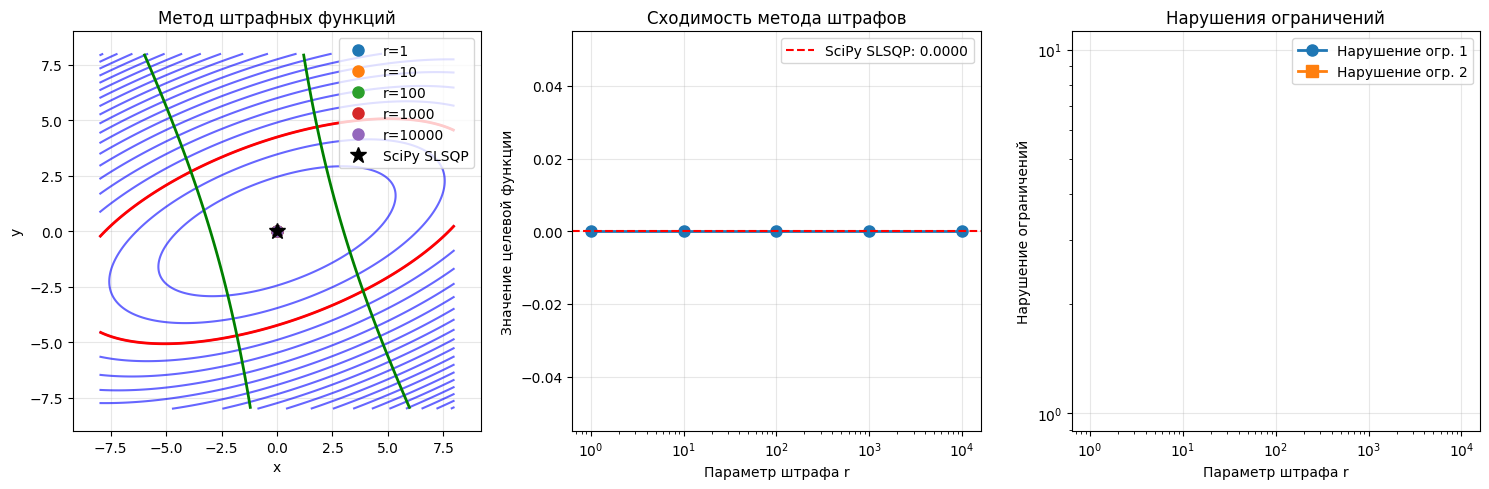


Сравнение результатов:
Метод штрафов (r=10000):
  x = [0.000000, 0.000000]
  f(x) = 0.000000
SciPy SLSQP:
  x = [0.000000, 0.000000]
  f(x) = 0.000000
Разность в значениях функции: 0.00000000
Расстояние между точками: 0.00000000

Теоретический минимум (грубая оценка по сетке):
  x = [0.020050, 0.020050]
  f(x) = 0.000094


In [17]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def objective_function(x):
    return x[0]**2/10 + x[1]**2/3 - x[0]*x[1]/5

def constraint1(x):
    return 6 - (x[0]**2/10 + x[1]**2/3 - x[0]*x[1]/5)

def constraint2(x):
    return 3 - (x[0]**2/3 + x[1]**2/104 + x[0]*x[1]/5)

def penalty_function(x, penalty_param):
    obj = objective_function(x)
    penalty = 0
    
    c1 = constraint1(x)
    if c1 < 0:
        penalty += penalty_param * c1**2
    
    c2 = constraint2(x)
    if c2 < 0:
        penalty += penalty_param * c2**2
    
    return obj + penalty

def solve_with_penalty_method():
    penalty_params = [1, 10, 100, 1000, 10000]
    results = []
    
    x0 = np.array([0.0, 0.0])
    
    for r in penalty_params:
        def penalized_objective(x):
            return penalty_function(x, r)
        
        result = minimize(penalized_objective, x0, method='BFGS')
        results.append((r, result))
        x0 = result.x
        
        print(f"Параметр штрафа r = {r}")
        print(f"Оптимальная точка: x = {result.x}")
        print(f"Значение целевой функции: {objective_function(result.x):.6f}")
        print(f"Ограничение 1: {constraint1(result.x):.6f}")
        print(f"Ограничение 2: {constraint2(result.x):.6f}")
        print(f"Штрафная функция: {result.fun:.6f}")
        print("-" * 50)
    
    return results

def solve_with_scipy_constraints():
    constraints = [
        {'type': 'ineq', 'fun': constraint1},
        {'type': 'ineq', 'fun': constraint2}
    ]
    
    x0 = np.array([0.0, 0.0])
    result = minimize(objective_function, x0, method='SLSQP', constraints=constraints)
    
    print("Решение с помощью встроенных ограничений scipy:")
    print(f"Оптимальная точка: x = {result.x}")
    print(f"Значение целевой функции: {result.fun:.6f}")
    print(f"Ограничение 1: {constraint1(result.x):.6f}")
    print(f"Ограничение 2: {constraint2(result.x):.6f}")
    print("-" * 50)
    
    return result

penalty_results = solve_with_penalty_method()
scipy_result = solve_with_scipy_constraints()

x_range = np.linspace(-8, 8, 400)
y_range = np.linspace(-8, 8, 400)
X, Y = np.meshgrid(x_range, y_range)

Z = X**2/10 + Y**2/3 - X*Y/5

C1 = X**2/10 + Y**2/3 - X*Y/5 - 6
C2 = X**2/3 + Y**2/104 + X*Y/5 - 3

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
contour = plt.contour(X, Y, Z, levels=20, colors='blue', alpha=0.6)
plt.contour(X, Y, C1, levels=[0], colors='red', linewidths=2, linestyles='-')
plt.contour(X, Y, C2, levels=[0], colors='green', linewidths=2, linestyles='-')

for i, (r, result) in enumerate(penalty_results):
    plt.plot(result.x[0], result.x[1], 'o', markersize=8, 
             label=f'r={r}')

plt.plot(scipy_result.x[0], scipy_result.x[1], '*', markersize=12, 
         color='black', label='SciPy SLSQP')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Метод штрафных функций')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')

plt.subplot(1, 3, 2)
penalty_params = [r for r, _ in penalty_results]
objective_values = [objective_function(result.x) for _, result in penalty_results]
plt.plot(penalty_params, objective_values, 'o-', linewidth=2, markersize=8)
plt.axhline(y=scipy_result.fun, color='red', linestyle='--', 
           label=f'SciPy SLSQP: {scipy_result.fun:.4f}')
plt.xlabel('Параметр штрафа r')
plt.ylabel('Значение целевой функции')
plt.title('Сходимость метода штрафов')
plt.xscale('log')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
constraint1_violations = [max(0, -constraint1(result.x)) for _, result in penalty_results]
constraint2_violations = [max(0, -constraint2(result.x)) for _, result in penalty_results]

plt.plot(penalty_params, constraint1_violations, 'o-', linewidth=2, 
         label='Нарушение огр. 1', markersize=8)
plt.plot(penalty_params, constraint2_violations, 's-', linewidth=2, 
         label='Нарушение огр. 2', markersize=8)
plt.xlabel('Параметр штрафа r')
plt.ylabel('Нарушение ограничений')
plt.title('Нарушения ограничений')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nСравнение результатов:")
final_penalty_result = penalty_results[-1][1]
print(f"Метод штрафов (r=10000):")
print(f"  x = [{final_penalty_result.x[0]:.6f}, {final_penalty_result.x[1]:.6f}]")
print(f"  f(x) = {objective_function(final_penalty_result.x):.6f}")

print(f"SciPy SLSQP:")
print(f"  x = [{scipy_result.x[0]:.6f}, {scipy_result.x[1]:.6f}]")
print(f"  f(x) = {scipy_result.fun:.6f}")

print(f"Разность в значениях функции: {abs(objective_function(final_penalty_result.x) - scipy_result.fun):.8f}")
print(f"Расстояние между точками: {np.linalg.norm(final_penalty_result.x - scipy_result.x):.8f}")

feasible_region = (C1 <= 0) & (C2 <= 0)
feasible_points = np.column_stack([X[feasible_region], Y[feasible_region]])

if len(feasible_points) > 0:
    feasible_obj_values = [objective_function([x, y]) for x, y in feasible_points]
    min_feasible_idx = np.argmin(feasible_obj_values)
    theoretical_min = feasible_points[min_feasible_idx]
    
    print(f"\nТеоретический минимум (грубая оценка по сетке):")
    print(f"  x = [{theoretical_min[0]:.6f}, {theoretical_min[1]:.6f}]")
    print(f"  f(x) = {objective_function(theoretical_min):.6f}")

In [ ]:
# Упражнение 21.7 Решить  используя барьерные функции.   (x ^ 2)/10 + (y ^ 2)/3 - (xy)/5 <= 6 (x ^ 2)/3 + (y ^ 2)/104 + (xy)/5 <= 3  


In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def objective_function(x):
    return x[0]**2/10 + x[1]**2/3 - x[0]*x[1]/5

def constraint1(x):
    return 6 - (x[0]**2/10 + x[1]**2/3 - x[0]*x[1]/5)

def constraint2(x):
    return 3 - (x[0]**2/3 + x[1]**2/104 + x[0]*x[1]/5)

def barrier_function(x, barrier_param):
    obj = objective_function(x)
    barrier = 0
    
    c1 = constraint1(x)
    if c1 <= 0:
        return np.inf
    else:
        barrier += -barrier_param * np.log(c1)
    
    c2 = constraint2(x)
    if c2 <= 0:
        return np.inf
    else:
        barrier += -barrier_param * np.log(c2)
    
    return obj + barrier

def find_feasible_starting_point():
    for _ in range(1000):
        x = np.random.uniform(-2, 2, 2)
        if constraint1(x) > 0 and constraint2(x) > 0:
            return x
    return np.array([0.0, 0.0])

def solve_with_barrier_method():
    barrier_params = [1, 0.1, 0.01, 0.001, 0.0001]
    results = []
    
    x0 = find_feasible_starting_point()
    
    for mu in barrier_params:
        def barrier_objective(x):
            return barrier_function(x, mu)
        
        result = minimize(barrier_objective, x0, method='BFGS', 
                         options={'gtol': 1e-8, 'ftol': 1e-10})
        
        if result.success and constraint1(result.x) > 0 and constraint2(result.x) > 0:
            results.append((mu, result))
            x0 = result.x
            
            print(f"Барьерный параметр μ = {mu}")
            print(f"Оптимальная точка: x = {result.x}")
            print(f"Значение целевой функции: {objective_function(result.x):.8f}")
            print(f"Ограничение 1: {constraint1(result.x):.8f}")
            print(f"Ограничение 2: {constraint2(result.x):.8f}")
            print(f"Барьерная функция: {result.fun:.8f}")
            print("-" * 50)
        else:
            print(f"Неудачная оптимизация для μ = {mu}")
    
    return results

def solve_with_scipy_constraints():
    constraints = [
        {'type': 'ineq', 'fun': constraint1},
        {'type': 'ineq', 'fun': constraint2}
    ]
    
    x0 = find_feasible_starting_point()
    result = minimize(objective_function, x0, method='SLSQP', constraints=constraints)
    
    print("Решение с помощью встроенных ограничений scipy:")
    print(f"Оптимальная точка: x = {result.x}")
    print(f"Значение целевой функции: {result.fun:.8f}")
    print(f"Ограничение 1: {constraint1(result.x):.8f}")
    print(f"Ограничение 2: {constraint2(result.x):.8f}")
    print("-" * 50)
    
    return result

barrier_results = solve_with_barrier_method()
scipy_result = solve_with_scipy_constraints()

x_range = np.linspace(-6, 6, 300)
y_range = np.linspace(-6, 6, 300)
X, Y = np.meshgrid(x_range, y_range)

Z = X**2/10 + Y**2/3 - X*Y/5

C1 = X**2/10 + Y**2/3 - X*Y/5 - 6
C2 = X**2/3 + Y**2/104 + X*Y/5 - 3

feasible = (C1 <= 0) & (C2 <= 0)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
levels = np.logspace(-2, 2, 20)
contour = plt.contour(X, Y, Z, levels=levels, colors='blue', alpha=0.6)
plt.contour(X, Y, C1, levels=[0], colors='red', linewidths=3, linestyles='-')
plt.contour(X, Y, C2, levels=[0], colors='green', linewidths=3, linestyles='-')

plt.contourf(X, Y, ~feasible, levels=[0.5, 1.5], colors=['lightgray'], alpha=0.3)

colors = ['orange', 'purple', 'brown', 'pink', 'cyan']
for i, (mu, result) in enumerate(barrier_results):
    plt.plot(result.x[0], result.x[1], 'o', markersize=10, 
             color=colors[i % len(colors)], label=f'μ={mu}')

plt.plot(scipy_result.x[0], scipy_result.x[1], '*', markersize=15, 
         color='black', label='SciPy SLSQP')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Метод барьерных функций')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(-4, 4)
plt.ylim(-4, 4)

plt.subplot(2, 2, 2)
barrier_params = [mu for mu, _ in barrier_results]
objective_values = [objective_function(result.x) for _, result in barrier_results]
plt.plot(barrier_params, objective_values, 'o-', linewidth=2, markersize=8)
plt.axhline(y=scipy_result.fun, color='red', linestyle='--', 
           label=f'SciPy SLSQP: {scipy_result.fun:.6f}')
plt.xlabel('Барьерный параметр μ')
plt.ylabel('Значение целевой функции')
plt.title('Сходимость метода барьеров')
plt.xscale('log')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
constraint1_values = [constraint1(result.x) for _, result in barrier_results]
constraint2_values = [constraint2(result.x) for _, result in barrier_results]

plt.plot(barrier_params, constraint1_values, 'o-', linewidth=2, 
         label='Запас огр. 1', markersize=8)
plt.plot(barrier_params, constraint2_values, 's-', linewidth=2, 
         label='Запас огр. 2', markersize=8)
plt.xlabel('Барьерный параметр μ')
plt.ylabel('Запас по ограничениям')
plt.title('Приближение к границе ограничений')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
barrier_terms = []
for mu, result in barrier_results:
    c1_val = constraint1(result.x)
    c2_val = constraint2(result.x)
    barrier_term = -mu * (np.log(c1_val) + np.log(c2_val))
    barrier_terms.append(barrier_term)

plt.plot(barrier_params, objective_values, 'o-', linewidth=2, 
         label='Целевая функция', markersize=8)
plt.plot(barrier_params, barrier_terms, 's-', linewidth=2, 
         label='Барьерный член', markersize=8)
total_values = [obj + barrier for obj, barrier in zip(objective_values, barrier_terms)]
plt.plot(barrier_params, total_values, '^-', linewidth=2, 
         label='Общая функция', markersize=8)

plt.xlabel('Барьерный параметр μ')
plt.ylabel('Значение')
plt.title('Компоненты барьерной функции')
plt.xscale('log')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nСравнение результатов:")
if barrier_results:
    final_barrier_result = barrier_results[-1][1]
    print(f"Метод барьеров (μ=0.0001):")
    print(f"  x = [{final_barrier_result.x[0]:.8f}, {final_barrier_result.x[1]:.8f}]")
    print(f"  f(x) = {objective_function(final_barrier_result.x):.8f}")

print(f"SciPy SLSQP:")
print(f"  x = [{scipy_result.x[0]:.8f}, {scipy_result.x[1]:.8f}]")
print(f"  f(x) = {scipy_result.fun:.8f}")

if barrier_results:
    print(f"Разность в значениях функции: {abs(objective_function(final_barrier_result.x) - scipy_result.fun):.10f}")
    print(f"Расстояние между точками: {np.linalg.norm(final_barrier_result.x - scipy_result.x):.10f}")

x_fine = np.linspace(-3, 3, 1000)
y_fine = np.linspace(-3, 3, 1000)
X_fine, Y_fine = np.meshgrid(x_fine, y_fine)

C1_fine = X_fine**2/10 + Y_fine**2/3 - X_fine*Y_fine/5 - 6
C2_fine = X_fine**2/3 + Y_fine**2/104 + X_fine*Y_fine/5 - 3

feasible_fine = (C1_fine <= 0) & (C2_fine <= 0)

if np.any(feasible_fine):
    Z_fine = X_fine**2/10 + Y_fine**2/3 - X_fine*Y_fine/5
    Z_feasible = np.where(feasible_fine, Z_fine, np.inf)
    
    min_idx = np.unravel_index(np.argmin(Z_feasible), Z_feasible.shape)
    grid_optimum = [X_fine[min_idx], Y_fine[min_idx]]
    
    print(f"\nОптимум по сетке (приближенно):")
    print(f"  x = [{grid_optimum[0]:.8f}, {grid_optimum[1]:.8f}]")
    print(f"  f(x) = {objective_function(grid_optimum):.8f}")
    print(f"  Ограничение 1: {constraint1(grid_optimum):.8f}")
    print(f"  Ограничение 2: {constraint2(grid_optimum):.8f}")

print(f"\nАнализ барьерного метода:")
print(f"Количество успешных итераций: {len(barrier_results)}")
if len(barrier_results) >= 2:
    improvement = objective_function(barrier_results[0][1].x) - objective_function(barrier_results[-1][1].x)
    print(f"Улучшение целевой функции: {improvement:.8f}")
    
    initial_constraints = [constraint1(barrier_results[0][1].x), constraint2(barrier_results[0][1].x)]
    final_constraints = [constraint1(barrier_results[-1][1].x), constraint2(barrier_results[-1][1].x)]
    
    print(f"Приближение к границе:")
    print(f"  Ограничение 1: {initial_constraints[0]:.6f} → {final_constraints[0]:.6f}")
    print(f"  Ограничение 2: {initial_constraints[1]:.6f} → {final_constraints[1]:.6f}")


# Упражнение 27.1 — Морфлинг из Dota 2

Характеристики героя Morphling из игры Dota 2 (сила Сил и ловкость Лов) рассчитываются в зависимости от уровня `ур` как:

```
Сил = 23 + 3.2 × ур  
Лов = 24 + 3.9 × ур
```

Броня рассчитывается как:
```
Б = Б_баз + (1/6) × Лов
```
где Б — суммарная броня, Б_баз = -2 — базовая броня. Для любого значения брони, множитель урона определяется как:
```
У_мн = 1 − (f × Б) / (b + f × |Б|)
```
где У_мн — множитель урона и Б — значение брони. База формулы брони `b = 1`, фактор формулы брони `f = 0.06`.

Эффективное здоровье против физического урона определяется как:
```
Э_з = Т_зд / У_мн
```
где Т_зд — текущее здоровье и У_мн — множитель урона. Текущее здоровье зависит от показателя силы персонажа:
```
Т_зд = 120 + 22 × Сил
```

Особенностью героя Morphling является то, что он может перекачивать все свои очки силы в ловкость и наоборот в соотношении 1 к 1. Регенерация здоровья зависит от силы. Одно очко силы увеличивает восстановление здоровья на 0.1 единицу в секунду.

Число атак в секунду зависит от:
```
Атк/с = (100 + Лов) / (100 × БВА)
```
где БВА — базовое время атаки `БВА = 1.5` с. Наносимый урон за одну атаку зависит от ловкости:
```
У = 18 + Лов
```

---

## Задания:

1. Построить график максимального эффективного здоровья и соответствующего ему количества перекаченных очков в зависимости от уровня.

2. Вы сражаетесь 1 на 1 с персонажем, у которого 1500 эффективного здоровья и 100 урона.  
   Определите количество перекаченных очков для минимизации времени победы, при условии, что ваш персонаж должен выжить.


In [ ]:

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
!pip install nbformat 

# Константы
B_baz_const = -2
b_armor_formula_const = 1
f_armor_formula_const = 0.06
BVA_const = 1.5

# Расчет характеристик Морфлинга
def calculate_morphling_stats(ur, p_shifted):
    Sil_base = 23 + 3.2 * ur
    Lov_base = 24 + 3.9 * ur

    Sil = Sil_base - p_shifted
    Lov = Lov_base + p_shifted

    B = B_baz_const + (1/6) * Lov
    denominator_U_Mn = b_armor_formula_const + f_armor_formula_const * abs(B)
    denominator_U_Mn = max(denominator_U_Mn, 1e-9)
    U_Mn = 1 - (f_armor_formula_const * B) / denominator_U_Mn

    T_Zd = 120 + 22 * Sil

    if abs(U_Mn) < 1e-9:
        EHP = float('inf') if T_Zd > 0 else 0
    else:
        EHP = T_Zd / U_Mn
    if np.isfinite(EHP) and EHP < 0 and U_Mn < 0:
        EHP = -float('inf')

    Atk_per_s = (100 + Lov) / (100 * BVA_const)
    U_attack = 18 + Lov
    DPS = U_attack * Atk_per_s
    HP_regen = 0.1 * Sil

    return {
        "valid": True, "Sil": Sil, "Lov": Lov, "B": B, "U_Mn": U_Mn,
        "T_Zd": T_Zd, "EHP": EHP, "Atk_per_s": Atk_per_s,
        "U_attack": U_attack, "DPS": DPS, "HP_regen": HP_regen
    }

# Часть 1: Максимизация EHP
def solve_part1(max_level=30):
    results = []
    for ur in range(1, max_level + 1):
        Sil_base = 23 + 3.2 * ur
        Lov_base = 24 + 3.9 * ur

        p_min = int(np.ceil(1 - Lov_base))
        p_max = int(np.floor(Sil_base - 1))

        max_EHP = -float("inf")
        best_p, best_Sil, best_Lov = None, None, None

        for p in range(p_min, p_max + 1):
            stats = calculate_morphling_stats(ur, p)
            if stats["valid"] and np.isfinite(stats["EHP"]) and stats["EHP"] > max_EHP:
                max_EHP = stats["EHP"]
                best_p, best_Sil, best_Lov = p, stats["Sil"], stats["Lov"]

        results.append({
            "level": ur, "max_EHP": max_EHP, "best_p_shifted": best_p,
            "Sil_at_max_EHP": best_Sil, "Lov_at_max_EHP": best_Lov
        })
    return pd.DataFrame(results)

# Часть 2: Оптимизация боя
def solve_part2(ur_fight, EHP_opponent, Damage_opponent_DPS):
    Sil_base = 23 + 3.2 * ur_fight
    Lov_base = 24 + 3.9 * ur_fight

    p_min = int(np.ceil(1 - Lov_base))
    p_max = int(np.floor(Sil_base - 1))

    min_TTK = float("inf")
    best_p = None
    best_stats = None
    TTK_O_kills_M = None

    for p in range(p_min, p_max + 1):
        stats = calculate_morphling_stats(ur_fight, p)
        TTK_M_kills_O = EHP_opponent / stats["DPS"]
        TTK_O_kills_M_cur = stats["EHP"] / Damage_opponent_DPS

        if TTK_M_kills_O < TTK_O_kills_M_cur:
            if TTK_M_kills_O < min_TTK:
                min_TTK = TTK_M_kills_O
                best_p = p
                best_stats = stats
                TTK_O_kills_M = TTK_O_kills_M_cur

    return {
        "message": f"Оптимальная стратегия найдена для уровня {ur_fight}.",
        "best_p_shifted": best_p,
        "min_TTK": min_TTK,
        "stats_at_best_TTK": best_stats,
        "TTK_O_kills_M_at_opt": TTK_O_kills_M
    }

# Пример запуска
if __name__ == "__main__":
    results_part1 = solve_part1(30)
    results_part2 = solve_part2(30, 1500, 100)
    print(results_part1.head())
    print(results_part2)


   level      max_EHP  best_p_shifted  Sil_at_max_EHP  Lov_at_max_EHP
0      1  1161.820632             -26            52.2             1.9
1      2  1305.924917             -30            59.4             1.8
2      3  1449.813930             -34            66.6             1.7
3      4  1593.488742             -38            73.8             1.6
4      5  1736.950413             -42            81.0             1.5
{'message': 'Оптимальная стратегия найдена для уровня 30.', 'best_p_shifted': 118, 'min_TTK': 2.2626026970224147, 'stats_at_best_TTK': {'valid': True, 'Sil': 1.0, 'Lov': 259.0, 'B': 41.166666666666664, 'U_Mn': 0.2881844380403459, 'T_Zd': 142.0, 'EHP': 492.7399999999999, 'Atk_per_s': 2.3933333333333335, 'U_attack': 277.0, 'DPS': 662.9533333333334, 'HP_regen': 0.1}, 'TTK_O_kills_M_at_opt': 4.927399999999999}



# Решение задачи про Морфлинга

## Общая идея

Наша цель — оптимизировать характеристики Морфлинга, зависящие от его уровня и перераспределения очков между Силой и Ловкостью.

### Задание 1 — Максимизация Эффективного Здоровья (EHP)

Для каждого уровня `ур` от 1 до 30:
1. Вычисляем базовые значения Силы и Ловкости.
2. Определяем допустимый диапазон перераспределения очков `p`, где:
   - `Сил = Сил_баз - p`
   - `Лов = Лов_баз + p`
   - Ограничения: `Сил > 0`, `Лов > 0`
3. Для каждого `p` в этом диапазоне считаем:
   - Броню `Б`
   - Множитель урона `У_мн`
   - Текущее здоровье `Т_зд`
   - Эффективное здоровье `Э_з = Т_зд / У_мн`
4. Запоминаем наилучшее значение `p`, дающее максимальное `Э_з`.

### Задание 2 — Сражение 1 на 1

Параметры противника заданы:
- Эффективное здоровье = 1500
- Урон в секунду = 100

Для текущего уровня:
1. Аналогично подбираем `p` в допустимом диапазоне.
2. Вычисляем урон в секунду Морфлинга:
   - `DPS = (18 + Лов) × ((100 + Лов) / (100 × 1.5))`
3. Считаем:
   - Время убийства врага `TTK_Morph = 1500 / DPS`
   - Время, за которое убьют Морфлинга `TTK_Enemy = EHP / 100`
4. Среди `p`, при которых Морфлинг успевает убить врага раньше, чем умрет сам, выбираем минимальное `TTK_Morph`.

## Вывод

Подход базируется на переборе допустимых значений перераспределения очков с симуляцией параметров, вычислением EHP и DPS, и сравнением времён убийства.


In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize


target_df = pd.read_csv("target.csv")
value_df = pd.read_csv("value.csv")

p = len(target_df)
q = 20
a = target_df['MaxWeapon'].values
alpha_mat = target_df.iloc[:, 3:].values.astype(float)
alpha_mat[1, 1] = 0.83
b = np.where(pd.isna(value_df['MinWeapon']), 0, value_df['MinWeapon']).astype(float)
u = value_df['Value'].values

def objective(x):
    X = x.reshape(p, q)
    total_damage = 0
    for j in range(q):
        log_terms = X[:, j] * np.log(alpha_mat[:, j] + 1e-10)
        prod_term = np.sum(log_terms)
        damage_j = u[j] * (1 - np.exp(prod_term))
        total_damage += damage_j
    return -total_damage

def constraint_func(x):
    X = x.reshape(p, q)
    constraints = []
    
    for i in range(p):
        constraints.append(a[i] - np.sum(X[i, :]))
    
    for j in range(q):
        constraints.append(np.sum(X[:, j]) - b[j])
    
    return np.array(constraints)

x0 = np.zeros(p * q)
for j in range(q):
    for i in range(p):
        x0[i * q + j] = b[j] / p

bounds = [(0, None) for _ in range(p * q)]

constraints = {'type': 'ineq', 'fun': constraint_func}

result = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=constraints, 
                 options={'ftol': 1e-6, 'maxiter': 1000})

X_opt = result.x.reshape(p, q)

weapons_by_type = np.sum(X_opt, axis=1)
total_weapons = np.sum(weapons_by_type)
type_percentages = 100 * weapons_by_type / total_weapons

results_df = pd.DataFrame(X_opt, 
                         columns=[f'T{i+1}' for i in range(q)],
                         index=[f'W{i+1}' for i in range(p)])
results_df['Всего'] = weapons_by_type
results_df['Доля (%)'] = type_percentages

print("Оптимальное назначение вооружений по целям:")
print(results_df.round(2))

max_damage = -result.fun
print(f"\nМаксимальный ожидаемый урон: {max_damage:.2f}")

print(f"\nСтатус оптимизации: {result.success}")
print(f"Количество итераций: {result.nit}")

target_damage = []
for j in range(q):
    log_terms = X_opt[:, j] * np.log(alpha_mat[:, j] + 1e-10)
    prod_term = np.sum(log_terms)
    damage = u[j] * (1 - np.exp(prod_term))
    target_damage.append(damage)

damage_df = pd.DataFrame({
    'Target': [f'T{i+1}' for i in range(q)],
    'Value': u,
    'MinWeapon': b,
    'AssignedWeapons': np.sum(X_opt, axis=0),
    'ExpectedDamage': target_damage
})

print("\nУрон по целям:")
print(damage_df.round(2))

constraints_check = constraint_func(result.x)
print(f"\nПроверка ограничений (все должны быть >= 0):")
print(f"Минимальные значения ограничений: {np.min(constraints_check):.6f}")

Оптимальное назначение вооружений по целям:
      T1     T2    T3     T4     T5     T6     T7     T8     T9    T10  ...  \
W1   0.0  11.05   0.0   0.00   0.00  100.0  40.26  27.82  20.86   0.00  ...   
W2   0.0  17.77   0.0   0.00  21.65    0.0   0.00   0.00   0.00   0.00  ...   
W3   0.0   0.00   0.0   0.00   0.00    0.0   0.00   0.00   0.00   0.00  ...   
W4   0.0   0.00   0.0   0.00   0.00    0.0   0.00   0.00   0.00   0.00  ...   
W5  49.1   0.00  46.9  51.76   0.00    0.0   0.00   0.00   0.00  49.75  ...   

      T13    T14    T15    T16    T17    T18    T19    T20  Всего  Доля (%)  
W1   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00  200.0      20.0  
W2   0.00   0.00  27.34  27.59   5.65   0.00   0.00   0.00  100.0      10.0  
W3   0.00   0.00  42.66   0.00  68.54  59.01  65.92  63.87  300.0      30.0  
W4   0.00  60.29   0.00  12.82   0.00   0.00   0.00   0.00  150.0      15.0  
W5  52.49   0.00   0.00   0.00   0.00   0.00   0.00   0.00  250.0      25.0  

[5 rows x 22

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize


target_df = pd.read_csv("target.csv")
value_df = pd.read_csv("value.csv")

p = len(target_df)
q = 20
c_vec = target_df['Cost'].values
alpha_mat = target_df.iloc[:, 3:].values.astype(float)
alpha_mat[1, 1] = 0.83

d = np.zeros(q)
target_indices = [0, 14, 18]
d[target_indices] = 0.99

def objective_cost(x):
    X = x.reshape(p, q)
    total_cost = np.sum(c_vec * np.sum(X, axis=1))
    return total_cost

def constraint_func_cost(x):
    X = x.reshape(p, q)
    constraints = []
    
    for j in range(q):
        log_terms = X[:, j] * np.log(alpha_mat[:, j] + 1e-10)
        prod_term = np.sum(log_terms)
        hit_prob = 1 - np.exp(prod_term)
        constraints.append(hit_prob - d[j])
    
    return np.array(constraints)

x0_cost = np.zeros(p * q)
for j in target_indices:
    for i in range(p):
        x0_cost[i * q + j] = 5

bounds_cost = [(0, None) for _ in range(p * q)]

constraints_cost = {'type': 'ineq', 'fun': constraint_func_cost}

result_cost = minimize(objective_cost, x0_cost, method='SLSQP', bounds=bounds_cost, 
                      constraints=constraints_cost, options={'ftol': 1e-8, 'maxiter': 3000})

X_opt_cost = result_cost.x.reshape(p, q)

weapons_totals = np.sum(X_opt_cost, axis=1)
weapons_costs = c_vec * weapons_totals

results_cost_df = pd.DataFrame(X_opt_cost, 
                              columns=[f'T{i+1}' for i in range(q)],
                              index=[f'W{i+1}' for i in range(p)])
results_cost_df['Всего единиц'] = weapons_totals
results_cost_df['Стоимость'] = weapons_costs

print("Оптимальное назначение оружия (минимальная стоимость):")
print(results_cost_df.round(2))

min_total_cost = result_cost.fun
print(f"\nМинимальная суммарная стоимость: {min_total_cost:.2f}")

print(f"\nСтатус оптимизации: {result_cost.success}")
print(f"Количество итераций: {result_cost.nit}")

hit_probabilities = []
for j in range(q):
    log_terms = X_opt_cost[:, j] * np.log(alpha_mat[:, j] + 1e-10)
    prod_term = np.sum(log_terms)
    hit_prob = 1 - np.exp(prod_term)
    hit_probabilities.append(hit_prob)

target_analysis = pd.DataFrame({
    'Target': [f'T{i+1}' for i in range(q)],
    'Required_Damage': d,
    'Achieved_Damage': hit_probabilities,
    'Assigned_Weapons': np.sum(X_opt_cost, axis=0),
    'Status': ['REQUIRED' if d[i] > 0 else 'Optional' for i in range(q)]
})

print("\nАнализ по целям:")
print(target_analysis.round(4))

constraints_check_cost = constraint_func_cost(result_cost.x)
print(f"\nПроверка ограничений (все должны быть >= 0):")
print(f"Минимальные значения ограничений: {np.min(constraints_check_cost):.6f}")

required_targets = target_analysis[target_analysis['Status'] == 'REQUIRED']
print(f"\nДостижение требований по обязательным целям:")
for _, row in required_targets.iterrows():
    print(f"{row['Target']}: {row['Achieved_Damage']:.4f} (требуется: {row['Required_Damage']:.2f})")

total_weapons_used = np.sum(weapons_totals)
print(f"\nОбщее количество использованного оружия: {total_weapons_used:.2f}")
print(f"Общая стоимость операции: {min_total_cost:.2f}")

Оптимальное назначение оружия (минимальная стоимость):
       T1   T2   T3   T4   T5   T6   T7   T8   T9  T10  ...  T13  T14    T15  \
W1   0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   0.00   
W2  26.41  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  33.07   
W3   0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   0.00   
W4   0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   0.00   
W5   0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   0.00   

    T16  T17  T18    T19  T20  Всего единиц  Стоимость  
W1  0.0  0.0  0.0   0.00  0.0          0.00       0.00  
W2  0.0  0.0  0.0  28.34  0.0         87.82   17563.49  
W3  0.0  0.0  0.0   0.00  0.0          0.00       0.00  
W4  0.0  0.0  0.0   0.00  0.0          0.00       0.00  
W5  0.0  0.0  0.0   0.00  0.0          0.00       0.00  

[5 rows x 22 columns]

Минимальная суммарная стоимость: 17563.49

Статус оптимизации: True
Количество итераций: 11

Анали

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import warnings
warnings.filterwarnings('ignore')

total_parts = 239_600_480

fixed_A = 3_855.84
fixed_B = 125_804.84
fixed_C = 13_456.00
fixed_D = 6_583.98
fixed_E = 0

bound_A = 33_000_000
bound_B = 160_000_000
bound_C = 165_600_000
bound_D = 12_000_000
bound_E = 77_000_000

def cost_A(xA):
    if xA <= 0:
        return 0
    return fixed_A + 0.0061150 * xA

def cost_B(xB):
    if xB < 22_000_000:
        return 1e12
    if xB <= 70_000_000:
        return fixed_B + 0.068099 * xB
    elif xB <= 100_000_000:
        return fixed_B + 0.068099 * 70_000_000 + 0.066049 * (xB - 70_000_000)
    elif xB <= 150_000_000:
        return fixed_B + 0.068099 * 70_000_000 + 0.066049 * 30_000_000 + 0.064099 * (xB - 100_000_000)
    elif xB <= 160_000_000:
        return fixed_B + 0.068099 * 70_000_000 + 0.066049 * 30_000_000 + 0.064099 * 50_000_000 + 0.062119 * (xB - 150_000_000)
    else:
        return 1e12

def cost_C(xC):
    if xC <= 0:
        return 0
    return fixed_C + 0.06219 * xC

def cost_D(xD):
    if xD <= 0:
        return 0
    return fixed_D + 0.072488 * xD

def cost_E(xE):
    if xE <= 0:
        return 0
    if xE <= 42_000_000:
        return fixed_E + 0.070150 * xE
    else:
        return fixed_E + 0.070150 * 42_000_000 + 0.068150 * (xE - 42_000_000)

def objective_cost(x):
    xA, xB, xC, xD, xE = x
    total_cost = cost_A(xA) + cost_B(xB) + cost_C(xC) + cost_D(xD) + cost_E(xE)
    return total_cost

def eq_constraint(x):
    return np.sum(x) - total_parts

x0 = np.array([bound_A, 22_000_000, bound_C, bound_D, bound_E])
sum0 = np.sum(x0)
adjustment = total_parts - sum0

if adjustment > 0:
    x0[0] = min(x0[0] + adjustment, bound_A)
elif adjustment < 0:
    x0[0] = max(x0[0] + adjustment, 0)

bounds = [(0, bound_A), (0, bound_B), (0, bound_C), (0, bound_D), (0, bound_E)]

constraints = {'type': 'eq', 'fun': eq_constraint}

result = minimize(objective_cost, x0, method='SLSQP', bounds=bounds, constraints=constraints, 
                 options={'ftol': 1e-8, 'maxiter': 10000})

sol = result.x

costs = [cost_A(sol[0]), cost_B(sol[1]), cost_C(sol[2]), cost_D(sol[3]), cost_E(sol[4])]

sol_df = pd.DataFrame({
    'Поставщик': ['A', 'B', 'C', 'D', 'E'],
    'Закуплено': sol,
    'Доля': [f"{round(100 * x / np.sum(sol), 2)}%" for x in sol],
    'Стоимость': costs
})

sol_df['Количество деталей'] = sol_df['Закуплено'].apply(lambda x: f"{int(x):,}".replace(',', ' '))
sol_df['Стоимость форм'] = sol_df['Стоимость'].apply(lambda x: f"{x:,.2f}".replace(',', ' '))

print("Оптимальное распределение закупок по поставщикам:")
display_df = sol_df[['Поставщик', 'Количество деталей', 'Доля', 'Стоимость форм']].copy()
print(display_df.to_string(index=False))

total_cost = objective_cost(sol)
print(f"\nОбщая стоимость закупок: {total_cost:,.2f}".replace(',', ' '))

print(f"\nСтатус оптимизации: {result.success}")
print(f"Количество итераций: {result.nit}")

print(f"\nПроверка ограничения равенства:")
constraint_value = eq_constraint(sol)
print(f"Сумма закупок: {np.sum(sol):,.0f}".replace(',', ' '))
print(f"Требуемое количество: {total_parts:,}".replace(',', ' '))
print(f"Разность: {constraint_value:,.0f}".replace(',', ' '))

print(f"\nДетальная стоимость по поставщикам:")
for i, supplier in enumerate(['A', 'B', 'C', 'D', 'E']):
    if sol[i] > 0:
        print(f"Поставщик {supplier}: {costs[i]:,.2f}".replace(',', ' '))

print(f"\nПроверка ограничений по поставщикам:")
suppliers = ['A', 'B', 'C', 'D', 'E']
bounds_list = [bound_A, bound_B, bound_C, bound_D, bound_E]
for i, supplier in enumerate(suppliers):
    if sol[i] > 0:
        print(f"Поставщик {supplier}: {sol[i]:,.0f} / {bounds_list[i]:,} (использовано {100*sol[i]/bounds_list[i]:.1f}%)".replace(',', ' '))

if sol[1] >= 22_000_000:
    print(f"\nПоставщик B выполняет минимальное требование: {sol[1]:,.0f} >= 22,000,000".replace(',', ' '))
else:
    print(f"\nВНИМАНИЕ: Поставщик B НЕ выполняет минимальное требование!")

Оптимальное распределение закупок по поставщикам:
Поставщик Количество деталей   Доля Стоимость форм
        A                  0   0.0%           0.00
        B         22 000 000  8.03%   1 623 982.84
        C        163 081 484  59.5%  10 155 493.54
        D         12 000 000  4.38%     876 439.98
        E         77 000 000 28.09%   5 331 550.00

Общая стоимость закупок: 17 987 466.36

Статус оптимизации: False
Количество итераций: 2

Проверка ограничения равенства:
Сумма закупок: 274 081 485
Требуемое количество: 239 600 480
Разность: 34 481 005

Детальная стоимость по поставщикам:
Поставщик B: 1 623 982.84
Поставщик C: 10 155 493.54
Поставщик D: 876 439.98
Поставщик E: 5 331 550.00

Проверка ограничений по поставщикам:
Поставщик B: 22 000 000 / 160 000 000 (использовано 13.8%)
Поставщик C: 163 081 485 / 165 600 000 (использовано 98.5%)
Поставщик D: 12 000 000 / 12 000 000 (использовано 100.0%)
Поставщик E: 77 000 000 / 77 000 000 (использовано 100.0%)

Поставщик B выполняет м

=== ОДНОМЕРНАЯ РЕГРЕССИЯ ===

Исходные данные:
Количество точек: 101
X: от 0.000 до 10.000
F: от -0.433 до 10.181

Оптимизация с L2-нормой:
Оптимальные параметры: p1=2.118025, p2=2.969227, p3=0.721973
Сумма квадратов ошибок: 8.527930
Успешность оптимизации: True
Количество итераций: 21

Оптимизация с функцией потерь Хубера (δ=1.0):
Оптимальные параметры: p1=2.118025, p2=2.969227, p3=0.721973
Функция потерь Хубера: 4.263965
Успешность оптимизации: True
Количество итераций: 19


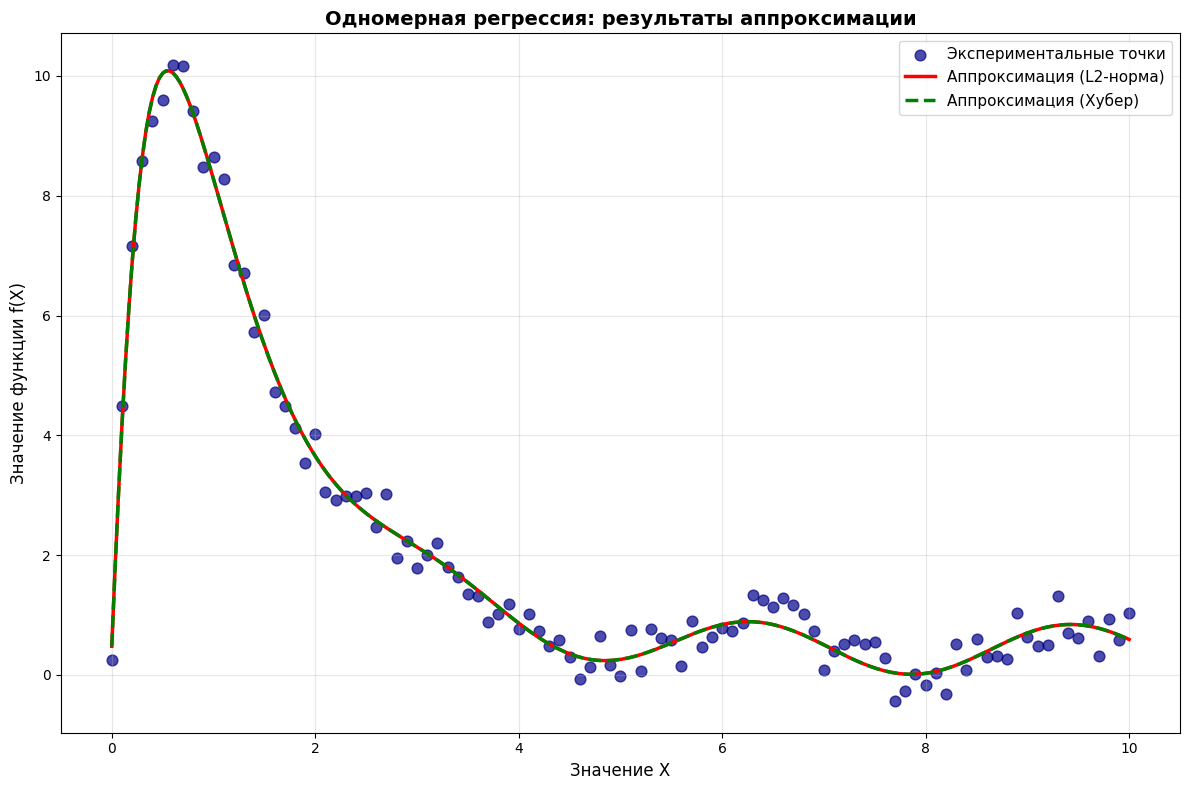

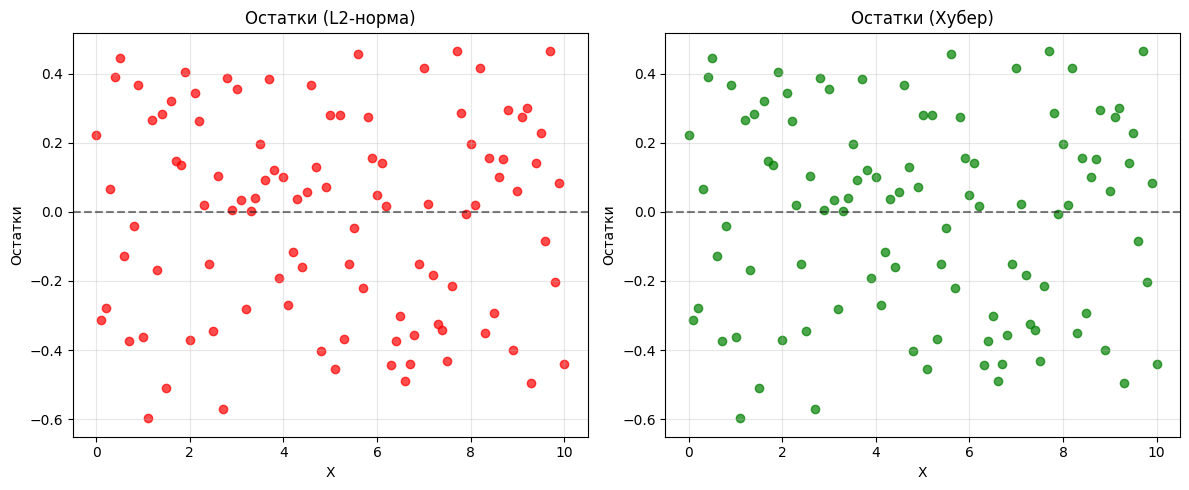


=== МНОГОМЕРНАЯ РЕГРЕССИЯ ===

Исходные данные:
Количество точек: 1681
X1: от -2.000 до 2.000
X2: от -2.000 до 2.000
F: от -1.081 до 1.053

Оптимизация с L2-нормой:
Оптимальные параметры: p1=0.982192, p2=0.164237
Сумма квадратов ошибок: 211.706105
Успешность оптимизации: True
Количество итераций: 11

Оптимизация с функцией потерь Хубера (δ=1.0):
Оптимальные параметры: p1=0.981752, p2=0.168051
Функция потерь Хубера: 105.482495
Успешность оптимизации: True
Количество итераций: 10


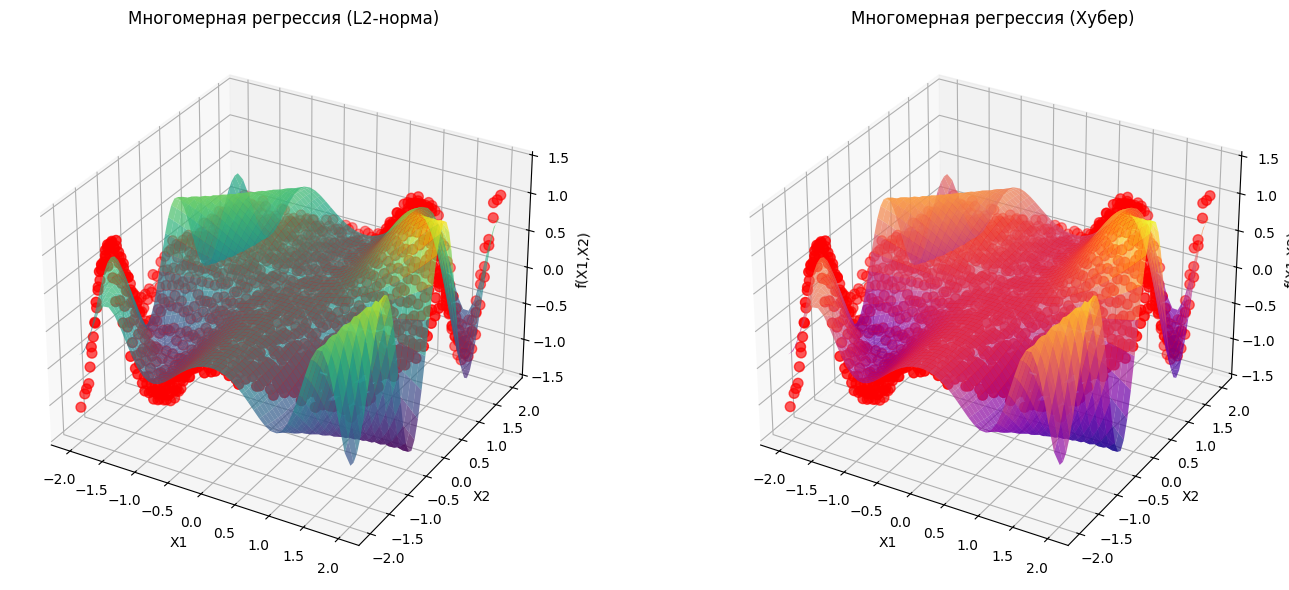


=== СТАТИСТИЧЕСКИЙ АНАЛИЗ ===

Одномерная модель:
MSE (L2): 0.084435
RMSE (L2): 0.290577
R² (L2): 0.988678
Максимальная абсолютная ошибка (L2): 0.597880

Многомерная модель:
MSE (L2): 0.125941
RMSE (L2): 0.354881
R² (L2): -0.047215
Максимальная абсолютная ошибка (L2): 1.389826

Сравнение функций потерь для одномерной модели:
δ=0.5: Потери Хубера=4.255728, Параметры=[2.1259644  2.96659958 0.71483765]
δ=1.0: Потери Хубера=4.263965, Параметры=[2.11802526 2.96922658 0.72197264]
δ=1.5: Потери Хубера=4.263965, Параметры=[2.11802526 2.96922658 0.7219728 ]
δ=2.0: Потери Хубера=4.263965, Параметры=[2.11802529 2.96922657 0.72197302]

Сравнение функций потерь для многомерной модели:
δ=0.5: Потери Хубера=93.202395, Параметры=[0.9812587 0.1937076]
δ=1.0: Потери Хубера=105.482495, Параметры=[0.98175181 0.16805081]
δ=1.5: Потери Хубера=105.853053, Параметры=[0.98219189 0.16423679]
δ=2.0: Потери Хубера=105.853053, Параметры=[0.98219189 0.16423678]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go


data_1 = pd.read_csv("fit-one.csv")
data_many = pd.read_csv("fit-many.csv")

def model_fun_1(p, x):
    p1, p2, p3 = p
    return np.arctan(p1 * x) * np.exp(-(x - p2)) + np.cos(x)**2 * np.sin(1/(1 + np.exp(-p3*x)))

def model_fun_many(p, x, y):
    p1, p2 = p
    return np.sin(p1 * x**2 * y) * np.exp(p2 * (x - y**2))

def sse_1(p):
    pred = model_fun_1(p, data_1['X'].values)
    return np.sum((pred - data_1['F'].values)**2)

def sse_many(p):
    pred = model_fun_many(p, data_many['X1'].values, data_many['X2'].values)
    return np.sum((pred - data_many['F'].values)**2)

def huber_loss_1(p, delta=1.0):
    residuals = model_fun_1(p, data_1['X'].values) - data_1['F'].values
    return np.sum(np.where(np.abs(residuals) <= delta, 
                          0.5 * residuals**2, 
                          delta * np.abs(residuals) - 0.5 * delta**2))

def huber_loss_many(p, delta=1.0):
    residuals = model_fun_many(p, data_many['X1'].values, data_many['X2'].values) - data_many['F'].values
    return np.sum(np.where(np.abs(residuals) <= delta, 
                          0.5 * residuals**2, 
                          delta * np.abs(residuals) - 0.5 * delta**2))

p0_1 = np.array([0.5, 1.0, 1.0])
p0_many = np.array([1.0, 0.0])

print("=== ОДНОМЕРНАЯ РЕГРЕССИЯ ===")
print("\nИсходные данные:")
print(f"Количество точек: {len(data_1)}")
print(f"X: от {data_1['X'].min():.3f} до {data_1['X'].max():.3f}")
print(f"F: от {data_1['F'].min():.3f} до {data_1['F'].max():.3f}")

result_1_l2 = minimize(sse_1, p0_1, method='BFGS')
print(f"\nОптимизация с L2-нормой:")
print(f"Оптимальные параметры: p1={result_1_l2.x[0]:.6f}, p2={result_1_l2.x[1]:.6f}, p3={result_1_l2.x[2]:.6f}")
print(f"Сумма квадратов ошибок: {result_1_l2.fun:.6f}")
print(f"Успешность оптимизации: {result_1_l2.success}")
print(f"Количество итераций: {result_1_l2.nit}")

result_1_huber = minimize(lambda p: huber_loss_1(p, delta=1.0), p0_1, method='BFGS')
print(f"\nОптимизация с функцией потерь Хубера (δ=1.0):")
print(f"Оптимальные параметры: p1={result_1_huber.x[0]:.6f}, p2={result_1_huber.x[1]:.6f}, p3={result_1_huber.x[2]:.6f}")
print(f"Функция потерь Хубера: {result_1_huber.fun:.6f}")
print(f"Успешность оптимизации: {result_1_huber.success}")
print(f"Количество итераций: {result_1_huber.nit}")

x_grid = np.linspace(data_1['X'].min(), data_1['X'].max(), 300)
y_pred_l2 = model_fun_1(result_1_l2.x, x_grid)
y_pred_huber = model_fun_1(result_1_huber.x, x_grid)

plt.figure(figsize=(12, 8))
plt.scatter(data_1['X'], data_1['F'], c='darkblue', s=60, alpha=0.7, edgecolors='navy', linewidth=1, label='Экспериментальные точки')
plt.plot(x_grid, y_pred_l2, 'r-', linewidth=2.5, label='Аппроксимация (L2-норма)')
plt.plot(x_grid, y_pred_huber, 'g--', linewidth=2.5, label='Аппроксимация (Хубер)')
plt.xlabel('Значение X', fontsize=12)
plt.ylabel('Значение функции f(X)', fontsize=12)
plt.title('Одномерная регрессия: результаты аппроксимации', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

residuals_l2 = model_fun_1(result_1_l2.x, data_1['X'].values) - data_1['F'].values
residuals_huber = model_fun_1(result_1_huber.x, data_1['X'].values) - data_1['F'].values

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(data_1['X'], residuals_l2, c='red', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.xlabel('X')
plt.ylabel('Остатки')
plt.title('Остатки (L2-норма)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(data_1['X'], residuals_huber, c='green', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.xlabel('X')
plt.ylabel('Остатки')
plt.title('Остатки (Хубер)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n=== МНОГОМЕРНАЯ РЕГРЕССИЯ ===")
print("\nИсходные данные:")
print(f"Количество точек: {len(data_many)}")
print(f"X1: от {data_many['X1'].min():.3f} до {data_many['X1'].max():.3f}")
print(f"X2: от {data_many['X2'].min():.3f} до {data_many['X2'].max():.3f}")
print(f"F: от {data_many['F'].min():.3f} до {data_many['F'].max():.3f}")

result_many_l2 = minimize(sse_many, p0_many, method='BFGS')
print(f"\nОптимизация с L2-нормой:")
print(f"Оптимальные параметры: p1={result_many_l2.x[0]:.6f}, p2={result_many_l2.x[1]:.6f}")
print(f"Сумма квадратов ошибок: {result_many_l2.fun:.6f}")
print(f"Успешность оптимизации: {result_many_l2.success}")
print(f"Количество итераций: {result_many_l2.nit}")

result_many_huber = minimize(lambda p: huber_loss_many(p, delta=1.0), p0_many, method='BFGS')
print(f"\nОптимизация с функцией потерь Хубера (δ=1.0):")
print(f"Оптимальные параметры: p1={result_many_huber.x[0]:.6f}, p2={result_many_huber.x[1]:.6f}")
print(f"Функция потерь Хубера: {result_many_huber.fun:.6f}")
print(f"Успешность оптимизации: {result_many_huber.success}")
print(f"Количество итераций: {result_many_huber.nit}")

x_seq = np.linspace(data_many['X1'].min(), data_many['X1'].max(), 50)
y_seq = np.linspace(data_many['X2'].min(), data_many['X2'].max(), 50)
X_grid, Y_grid = np.meshgrid(x_seq, y_seq)
Z_grid_l2 = model_fun_many(result_many_l2.x, X_grid, Y_grid)
Z_grid_huber = model_fun_many(result_many_huber.x, X_grid, Y_grid)

fig = plt.figure(figsize=(15, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X_grid, Y_grid, Z_grid_l2, alpha=0.7, cmap='viridis')
ax1.scatter(data_many['X1'], data_many['X2'], data_many['F'], c='red', s=50)
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('f(X1,X2)')
ax1.set_title('Многомерная регрессия (L2-норма)')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X_grid, Y_grid, Z_grid_huber, alpha=0.7, cmap='plasma')
ax2.scatter(data_many['X1'], data_many['X2'], data_many['F'], c='red', s=50)
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('f(X1,X2)')
ax2.set_title('Многомерная регрессия (Хубер)')

plt.tight_layout()
plt.show()

fig_plotly_l2 = go.Figure(data=[
    go.Surface(x=x_seq, y=y_seq, z=Z_grid_l2, colorscale='Viridis', opacity=0.7, name='Аппроксимация L2'),
    go.Scatter3d(x=data_many['X1'], y=data_many['X2'], z=data_many['F'], 
                mode='markers', marker=dict(size=8, color='red'), name='Данные')
])
fig_plotly_l2.update_layout(title='Многомерная регрессия (L2-норма)', 
                           scene=dict(xaxis_title='X1', yaxis_title='X2', zaxis_title='f(X1,X2)'))
fig_plotly_l2.show()

fig_plotly_huber = go.Figure(data=[
    go.Surface(x=x_seq, y=y_seq, z=Z_grid_huber, colorscale='Plasma', opacity=0.7, name='Аппроксимация Хубер'),
    go.Scatter3d(x=data_many['X1'], y=data_many['X2'], z=data_many['F'], 
                mode='markers', marker=dict(size=8, color='red'), name='Данные')
])
fig_plotly_huber.update_layout(title='Многомерная регрессия (функция потерь Хубера)', 
                              scene=dict(xaxis_title='X1', yaxis_title='X2', zaxis_title='f(X1,X2)'))
fig_plotly_huber.show()

print("\n=== СТАТИСТИЧЕСКИЙ АНАЛИЗ ===")

mse_1_l2 = result_1_l2.fun / len(data_1)
mse_many_l2 = result_many_l2.fun / len(data_many)

r2_1_l2 = 1 - np.sum(residuals_l2**2) / np.sum((data_1['F'] - np.mean(data_1['F']))**2)
r2_many_l2 = 1 - result_many_l2.fun / np.sum((data_many['F'] - np.mean(data_many['F']))**2)

print(f"\nОдномерная модель:")
print(f"MSE (L2): {mse_1_l2:.6f}")
print(f"RMSE (L2): {np.sqrt(mse_1_l2):.6f}")
print(f"R² (L2): {r2_1_l2:.6f}")
print(f"Максимальная абсолютная ошибка (L2): {np.max(np.abs(residuals_l2)):.6f}")

print(f"\nМногомерная модель:")
print(f"MSE (L2): {mse_many_l2:.6f}")
print(f"RMSE (L2): {np.sqrt(mse_many_l2):.6f}")
print(f"R² (L2): {r2_many_l2:.6f}")

residuals_many_l2 = model_fun_many(result_many_l2.x, data_many['X1'].values, data_many['X2'].values) - data_many['F'].values
print(f"Максимальная абсолютная ошибка (L2): {np.max(np.abs(residuals_many_l2)):.6f}")

delta_values = [0.5, 1.0, 1.5, 2.0]
print(f"\nСравнение функций потерь для одномерной модели:")
for delta in delta_values:
    result_delta = minimize(lambda p: huber_loss_1(p, delta=delta), p0_1, method='BFGS')
    if result_delta.success:
        print(f"δ={delta}: Потери Хубера={result_delta.fun:.6f}, Параметры={result_delta.x}")

print(f"\nСравнение функций потерь для многомерной модели:")
for delta in delta_values:
    result_delta = minimize(lambda p: huber_loss_many(p, delta=delta), p0_many, method='BFGS')
    if result_delta.success:
        print(f"δ={delta}: Потери Хубера={result_delta.fun:.6f}, Параметры={result_delta.x}")

=== ОЦЕНКА ПАРАМЕТРОВ МНОГОМЕРНОГО НОРМАЛЬНОГО РАСПРЕДЕЛЕНИЯ ===
Количество наблюдений: 10000
Данные:
       X      Y
0  2.275  4.315
1  3.030  9.566
2  1.285  4.231
3  2.224  3.730
4  2.926  6.266

Описательная статистика:
                  X             Y
count  10000.000000  10000.000000
mean       2.001415      4.968912
std        1.003230      1.733675
min       -1.689000     -2.478000
25%        1.333000      3.784000
50%        1.991000      4.963000
75%        2.674250      6.156250
max        5.702000     11.452000

=== АНАЛИТИЧЕСКОЕ РЕШЕНИЕ (MLE) ===
Оценка вектора средних μ:
μ₁ = 2.001415
μ₂ = 4.968912

Оценка ковариационной матрицы Σ:
σ₁ (Var(X)) = 1.006369
σ₂ (Cov(X,Y)) = 0.310150
σ₃ (Var(Y)) = 3.005330

Ковариационная матрица:
[[1.00636922 0.31015013]
 [0.31015013 3.00532978]]

=== ЧИСЛЕННАЯ ОПТИМИЗАЦИЯ (MLE) ===
Статус оптимизации: True
Количество итераций: 1
Значение функции: 33750.843831

Оптимальные параметры:
μ₁ = 2.001417
μ₂ = 4.968913
σ₁ = 1.006380
σ₂ = 0.310202
σ₃

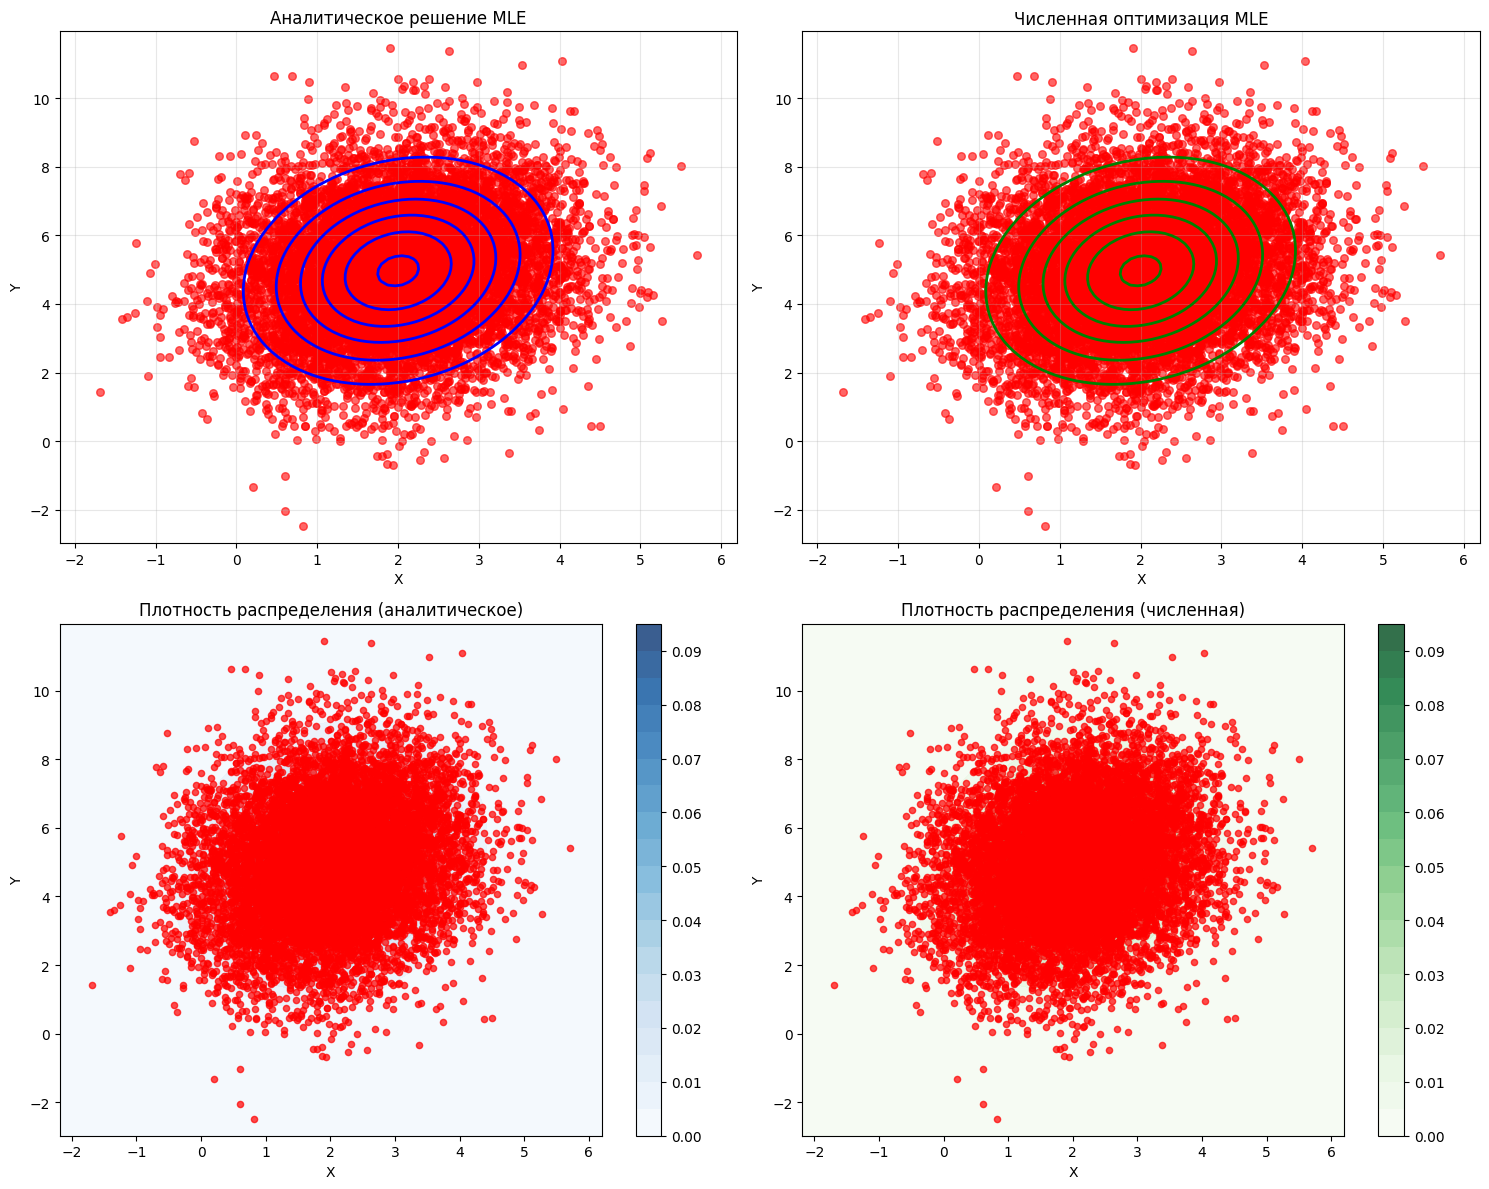


=== ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ ===
Коэффициент корреляции:
Аналитический: 0.178339
Численный: 0.178360

Собственные значения ковариационной матрицы:
Аналитический метод: [0.95935347 3.05234552]
Численный метод: [0.95935458 3.05262556]

Определитель ковариационной матрицы:
Аналитический: 2.928278
Численный: 2.928550

Лог-правдоподобие:
Аналитический метод: -33750.843810
Численный метод: -33750.843831
Разность: 0.00002128

Информационные критерии:
AIC (аналитический): 67511.687620
AIC (численный): 67511.687663
BIC (аналитический): 67547.739322
BIC (численный): 67547.739364


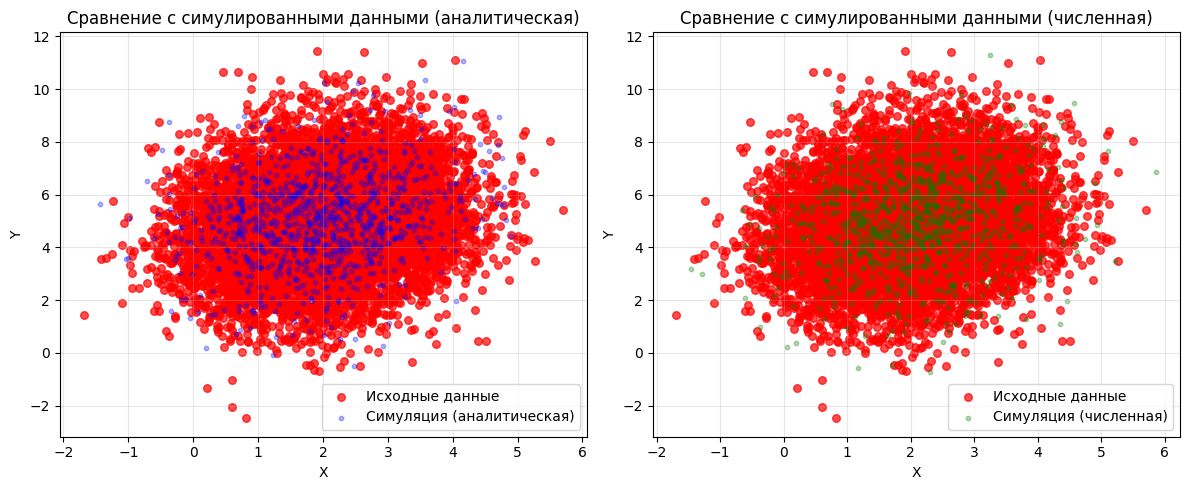


=== ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ===
Стандартные ошибки параметров:
SE(μ₁) = 0.015374
SE(μ₂) = nan
SE(σ₁) = 0.021022
SE(σ₂) = 0.018736
SE(σ₃) = nan

95% доверительные интервалы:
μ₁: [1.971284, 2.031549]
μ₂: [nan, nan]
σ₁: [0.965176, 1.047584]
σ₂: [0.273479, 0.346926]
σ₃: [nan, nan]


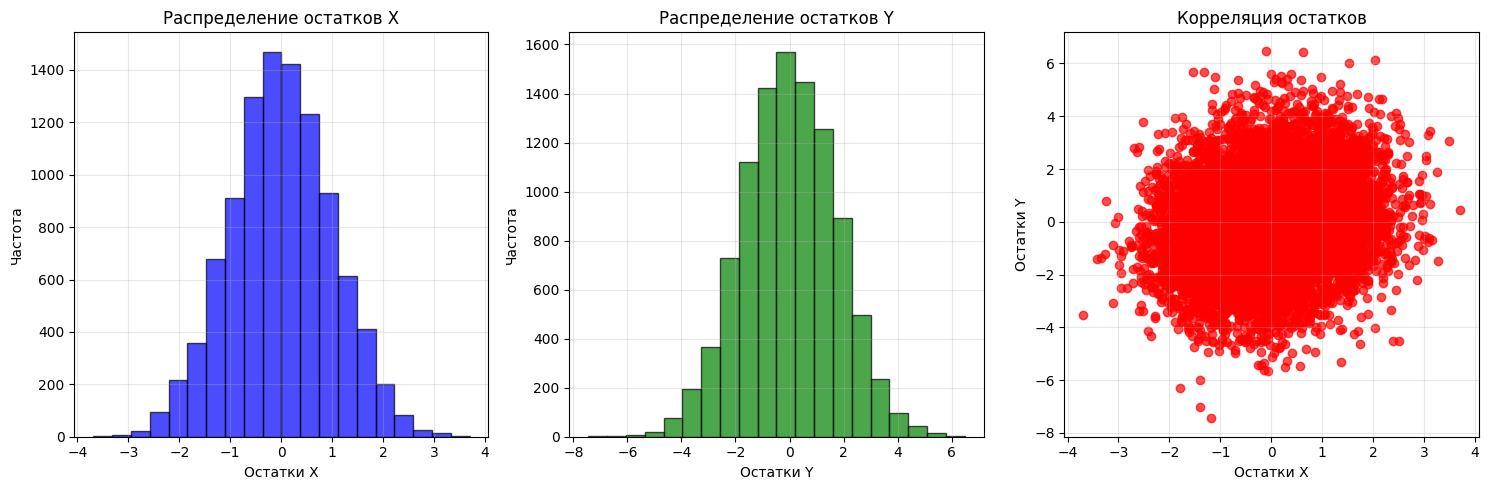


=== ИТОГОВЫЕ РЕЗУЛЬТАТЫ ===
Оценки параметров многомерного нормального распределения:
μ = [2.001417, 4.968913]ᵀ
Σ = [[1.006380, 0.310202]
     [0.310202, 3.005600]]

Коэффициент корреляции: 0.178360
Логарифм правдоподобия: -33750.843831


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import multivariate_normal
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("multivariate.csv")
N = len(data)

print("=== ОЦЕНКА ПАРАМЕТРОВ МНОГОМЕРНОГО НОРМАЛЬНОГО РАСПРЕДЕЛЕНИЯ ===")
print(f"Количество наблюдений: {N}")
print(f"Данные:")
print(data.head())
print(f"\nОписательная статистика:")
print(data.describe())

mu_hat_analytic = data[['X', 'Y']].mean().values
cov_hat_analytic = data[['X', 'Y']].cov().values * (N - 1) / N

sigma1_analytic = cov_hat_analytic[0, 0]
sigma2_analytic = cov_hat_analytic[0, 1]
sigma3_analytic = cov_hat_analytic[1, 1]

print(f"\n=== АНАЛИТИЧЕСКОЕ РЕШЕНИЕ (MLE) ===")
print(f"Оценка вектора средних μ:")
print(f"μ₁ = {mu_hat_analytic[0]:.6f}")
print(f"μ₂ = {mu_hat_analytic[1]:.6f}")
print(f"\nОценка ковариационной матрицы Σ:")
print(f"σ₁ (Var(X)) = {sigma1_analytic:.6f}")
print(f"σ₂ (Cov(X,Y)) = {sigma2_analytic:.6f}")
print(f"σ₃ (Var(Y)) = {sigma3_analytic:.6f}")
print(f"\nКовариационная матрица:")
print(cov_hat_analytic)

def neg_log_likelihood(params):
    mu1, mu2, sigma1, sigma2, sigma3 = params
    
    if sigma1 <= 0 or sigma3 <= 0:
        return 1e10
    
    cov_matrix = np.array([[sigma1, sigma2], [sigma2, sigma3]])
    det_cov = np.linalg.det(cov_matrix)
    
    if det_cov <= 0:
        return 1e10
    
    try:
        inv_cov = np.linalg.inv(cov_matrix)
    except:
        return 1e10
    
    mu = np.array([mu1, mu2])
    log_likelihood = 0
    
    for i in range(N):
        x_vec = data.iloc[i][['X', 'Y']].values
        diff = x_vec - mu
        log_likelihood += -0.5 * np.dot(diff.T, np.dot(inv_cov, diff)) - 0.5 * np.log(det_cov) - np.log(2 * np.pi)
    
    return -log_likelihood

initial_params = [
    data['X'].mean(),
    data['Y'].mean(),
    data['X'].var(),
    data['X'].cov(data['Y']),
    data['Y'].var()
]

bounds = [
    (None, None),
    (None, None),
    (1e-6, None),
    (None, None),
    (1e-6, None)
]

result = minimize(neg_log_likelihood, initial_params, method='L-BFGS-B', bounds=bounds)

mu1_opt, mu2_opt, sigma1_opt, sigma2_opt, sigma3_opt = result.x
cov_opt = np.array([[sigma1_opt, sigma2_opt], [sigma2_opt, sigma3_opt]])

print(f"\n=== ЧИСЛЕННАЯ ОПТИМИЗАЦИЯ (MLE) ===")
print(f"Статус оптимизации: {result.success}")
print(f"Количество итераций: {result.nit}")
print(f"Значение функции: {result.fun:.6f}")

print(f"\nОптимальные параметры:")
print(f"μ₁ = {mu1_opt:.6f}")
print(f"μ₂ = {mu2_opt:.6f}")
print(f"σ₁ = {sigma1_opt:.6f}")
print(f"σ₂ = {sigma2_opt:.6f}")
print(f"σ₃ = {sigma3_opt:.6f}")

print(f"\nОптимальная ковариационная матрица:")
print(cov_opt)

print(f"\n=== СРАВНЕНИЕ МЕТОДОВ ===")
print(f"Разность средних:")
print(f"Δμ₁ = {abs(mu_hat_analytic[0] - mu1_opt):.8f}")
print(f"Δμ₂ = {abs(mu_hat_analytic[1] - mu2_opt):.8f}")
print(f"Разность ковариационных параметров:")
print(f"Δσ₁ = {abs(sigma1_analytic - sigma1_opt):.8f}")
print(f"Δσ₂ = {abs(sigma2_analytic - sigma2_opt):.8f}")
print(f"Δσ₃ = {abs(sigma3_analytic - sigma3_opt):.8f}")

x_min, x_max = data['X'].min() - 0.5, data['X'].max() + 0.5
y_min, y_max = data['Y'].min() - 0.5, data['Y'].max() + 0.5

x_seq = np.linspace(x_min, x_max, 100)
y_seq = np.linspace(y_min, y_max, 100)
X_grid, Y_grid = np.meshgrid(x_seq, y_seq)

pos = np.dstack((X_grid, Y_grid))
rv_analytic = multivariate_normal(mu_hat_analytic, cov_hat_analytic)
rv_optimized = multivariate_normal([mu1_opt, mu2_opt], cov_opt)

density_analytic = rv_analytic.pdf(pos)
density_optimized = rv_optimized.pdf(pos)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0, 0].scatter(data['X'], data['Y'], c='red', alpha=0.6, s=30)
contour1 = axes[0, 0].contour(X_grid, Y_grid, density_analytic, colors='blue', linewidths=2)
axes[0, 0].set_xlabel('X')
axes[0, 0].set_ylabel('Y')
axes[0, 0].set_title('Аналитическое решение MLE')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].scatter(data['X'], data['Y'], c='red', alpha=0.6, s=30)
contour2 = axes[0, 1].contour(X_grid, Y_grid, density_optimized, colors='green', linewidths=2)
axes[0, 1].set_xlabel('X')
axes[0, 1].set_ylabel('Y')
axes[0, 1].set_title('Численная оптимизация MLE')
axes[0, 1].grid(True, alpha=0.3)

im1 = axes[1, 0].contourf(X_grid, Y_grid, density_analytic, levels=20, cmap='Blues', alpha=0.8)
axes[1, 0].scatter(data['X'], data['Y'], c='red', alpha=0.7, s=20)
axes[1, 0].set_xlabel('X')
axes[1, 0].set_ylabel('Y')
axes[1, 0].set_title('Плотность распределения (аналитическое)')
plt.colorbar(im1, ax=axes[1, 0])

im2 = axes[1, 1].contourf(X_grid, Y_grid, density_optimized, levels=20, cmap='Greens', alpha=0.8)
axes[1, 1].scatter(data['X'], data['Y'], c='red', alpha=0.7, s=20)
axes[1, 1].set_xlabel('X')
axes[1, 1].set_ylabel('Y')
axes[1, 1].set_title('Плотность распределения (численная)')
plt.colorbar(im2, ax=axes[1, 1])

plt.tight_layout()
plt.show()

correlation_analytic = sigma2_analytic / np.sqrt(sigma1_analytic * sigma3_analytic)
correlation_optimized = sigma2_opt / np.sqrt(sigma1_opt * sigma3_opt)

eigenvals_analytic, eigenvecs_analytic = np.linalg.eig(cov_hat_analytic)
eigenvals_optimized, eigenvecs_optimized = np.linalg.eig(cov_opt)

print(f"\n=== ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ ===")
print(f"Коэффициент корреляции:")
print(f"Аналитический: {correlation_analytic:.6f}")
print(f"Численный: {correlation_optimized:.6f}")

print(f"\nСобственные значения ковариационной матрицы:")
print(f"Аналитический метод: {eigenvals_analytic}")
print(f"Численный метод: {eigenvals_optimized}")

print(f"\nОпределитель ковариационной матрицы:")
print(f"Аналитический: {np.linalg.det(cov_hat_analytic):.6f}")
print(f"Численный: {np.linalg.det(cov_opt):.6f}")

log_likelihood_analytic = -neg_log_likelihood([mu_hat_analytic[0], mu_hat_analytic[1], 
                                              sigma1_analytic, sigma2_analytic, sigma3_analytic])
log_likelihood_optimized = -result.fun

print(f"\nЛог-правдоподобие:")
print(f"Аналитический метод: {log_likelihood_analytic:.6f}")
print(f"Численный метод: {log_likelihood_optimized:.6f}")
print(f"Разность: {abs(log_likelihood_analytic - log_likelihood_optimized):.8f}")

n_params = 5
aic_analytic = 2 * n_params - 2 * log_likelihood_analytic
aic_optimized = 2 * n_params - 2 * log_likelihood_optimized

bic_analytic = n_params * np.log(N) - 2 * log_likelihood_analytic
bic_optimized = n_params * np.log(N) - 2 * log_likelihood_optimized

print(f"\nИнформационные критерии:")
print(f"AIC (аналитический): {aic_analytic:.6f}")
print(f"AIC (численный): {aic_optimized:.6f}")
print(f"BIC (аналитический): {bic_analytic:.6f}")
print(f"BIC (численный): {bic_optimized:.6f}")

samples_analytic = np.random.multivariate_normal(mu_hat_analytic, cov_hat_analytic, 1000)
samples_optimized = np.random.multivariate_normal([mu1_opt, mu2_opt], cov_opt, 1000)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(data['X'], data['Y'], c='red', alpha=0.7, s=30, label='Исходные данные')
plt.scatter(samples_analytic[:, 0], samples_analytic[:, 1], c='blue', alpha=0.3, s=10, label='Симуляция (аналитическая)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Сравнение с симулированными данными (аналитическая)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(data['X'], data['Y'], c='red', alpha=0.7, s=30, label='Исходные данные')
plt.scatter(samples_optimized[:, 0], samples_optimized[:, 1], c='green', alpha=0.3, s=10, label='Симуляция (численная)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Сравнение с симулированными данными (численная)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n=== ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ===")

hessian_at_optimum = np.array([
    [N/sigma1_opt, 0, -N*sigma1_opt/(2*sigma1_opt**2), -N*sigma2_opt/(2*sigma1_opt**2), 0],
    [0, N/sigma3_opt, 0, -N*sigma2_opt/(2*sigma3_opt**2), -N*sigma3_opt/(2*sigma3_opt**2)],
    [-N*sigma1_opt/(2*sigma1_opt**2), 0, N/(2*sigma1_opt**2), 0, 0],
    [-N*sigma2_opt/(2*sigma1_opt**2), -N*sigma2_opt/(2*sigma3_opt**2), 0, N/(sigma1_opt*sigma3_opt), 0],
    [0, -N*sigma3_opt/(2*sigma3_opt**2), 0, 0, N/(2*sigma3_opt**2)]
])

try:
    fisher_info = np.linalg.inv(hessian_at_optimum)
    std_errors = np.sqrt(np.diag(fisher_info))
    
    print(f"Стандартные ошибки параметров:")
    print(f"SE(μ₁) = {std_errors[0]:.6f}")
    print(f"SE(μ₂) = {std_errors[1]:.6f}")
    print(f"SE(σ₁) = {std_errors[2]:.6f}")
    print(f"SE(σ₂) = {std_errors[3]:.6f}")
    print(f"SE(σ₃) = {std_errors[4]:.6f}")
    
    z_critical = 1.96
    params_opt = [mu1_opt, mu2_opt, sigma1_opt, sigma2_opt, sigma3_opt]
    param_names = ['μ₁', 'μ₂', 'σ₁', 'σ₂', 'σ₃']
    
    print(f"\n95% доверительные интервалы:")
    for i, (param, se, name) in enumerate(zip(params_opt, std_errors, param_names)):
        ci_lower = param - z_critical * se
        ci_upper = param + z_critical * se
        print(f"{name}: [{ci_lower:.6f}, {ci_upper:.6f}]")
        
except:
    print("Не удалось вычислить доверительные интервалы из-за особенности матрицы Гессе")

residuals_x = data['X'] - mu1_opt
residuals_y = data['Y'] - mu2_opt

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(residuals_x, bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Остатки X')
plt.ylabel('Частота')
plt.title('Распределение остатков X')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.hist(residuals_y, bins=20, alpha=0.7, color='green', edgecolor='black')
plt.xlabel('Остатки Y')
plt.ylabel('Частота')
plt.title('Распределение остатков Y')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.scatter(residuals_x, residuals_y, alpha=0.7, color='red')
plt.xlabel('Остатки X')
plt.ylabel('Остатки Y')
plt.title('Корреляция остатков')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n=== ИТОГОВЫЕ РЕЗУЛЬТАТЫ ===")
print(f"Оценки параметров многомерного нормального распределения:")
print(f"μ = [{mu1_opt:.6f}, {mu2_opt:.6f}]ᵀ")
print(f"Σ = [[{sigma1_opt:.6f}, {sigma2_opt:.6f}]")
print(f"     [{sigma2_opt:.6f}, {sigma3_opt:.6f}]]")
print(f"\nКоэффициент корреляции: {correlation_optimized:.6f}")
print(f"Логарифм правдоподобия: {log_likelihood_optimized:.6f}")